In [41]:
from pathlib import Path
import sys
import json
import datetime

PROJ_DIR = Path.cwd().parent.parent
sys.path.append(str(PROJ_DIR))

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import animation
import matplotlib.font_manager as fm
from IPython.display import HTML

import numpy as np
import pandas as pd

from src.defaults import ROOT_DIR
from src.checkpoint import CheckpointableData, Checkpointer
from src.config import BaseConfig, Require
from src.shared import get_env
from src.smbpo import SMBPO
from src.tester import Tester

fm.fontManager.addfont('../resources/arial.ttf')
fm.fontManager.addfont('/home/yudongjie/times.ttf')
fm.fontManager.addfont('/home/yudongjie/SIMSUN.ttf')

ROOT_DIR = Path(ROOT_DIR)
assert ROOT_DIR.is_dir(), ROOT_DIR
LOGS_DIR = ROOT_DIR / 'logs' / 'tracking'

params = {
    "font.family":'serif',
    "font.size": 14,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
    'animation.ffmpeg_path': r'/usr/bin/ffmpeg'
}
rcParams.update(params)

fontdict = {'family':'Times New Roman', 'size': 12}

class Config(BaseConfig):
    env_name = Require(str)
    env_cfg = {}
    seed = 1
    epochs = 600
    alg_cfg = SMBPO.Config()
    alg = 'DRPO'

def smooth(data, sm=1):
    '''Borrow from
    https://blog.csdn.net/qq_43280087/article/details/119894398
    '''
    if sm > 1:
        z = np.ones_like(data)
        y = np.ones(sm)*1.0
        d = np.convolve(y, data, "same")/np.convolve(y, z, "same")
    return d

Test log directory: /home/yudongjie/safe_proj/Safe_MBRL/logs/tracking/02-25-23_15.27.08_DRPO_22/test-2023-03-01-10-28-07
Set log dir to /home/yudongjie/safe_proj/Safe_MBRL/logs/tracking/02-25-23_15.27.08_DRPO_22/test-2023-03-01-10-28-07, log filename to log.txt
Creating new log file named log.txt
[10:28:07] Test log directory: /home/yudongjie/safe_proj/Safe_MBRL/logs/tracking/02-25-23_15.27.08_DRPO_22/test-2023-03-01-10-28-07


/home/yudongjie/safe_proj/safe-control-gym/safe_control_gym/utils/configuration.py:72: UserWarning: No agent/task config given.
  warnings.warn("No agent/task config given.")
/home/yudongjie/anaconda3/envs/smbrl/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


[10:28:09] Data load succeeded
[10:28:09] Solver load epoch 314 succeeded
surr 0: d_lon: 8, d_lat: 3.5, u: 4.5
0.00021755695


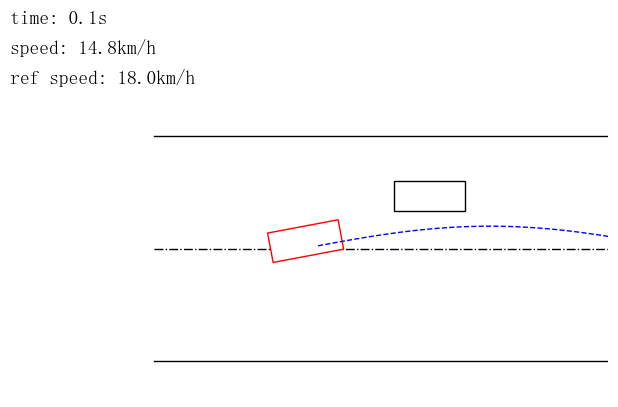

0.00021606684


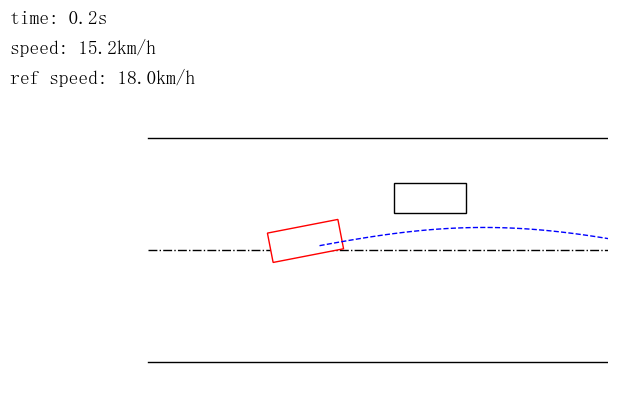

0.00021606684


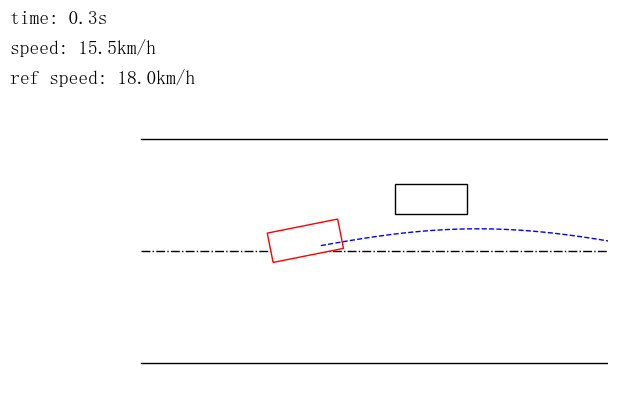

0.00021457672


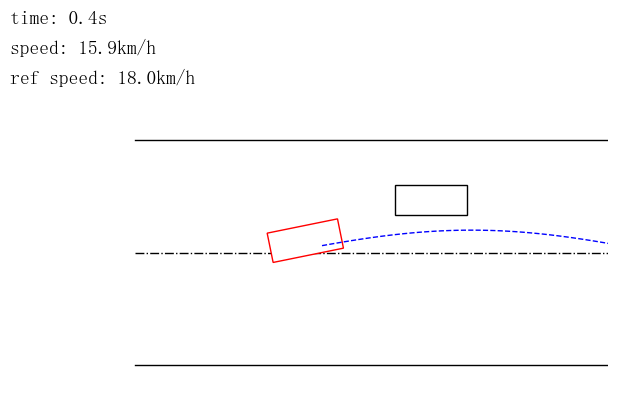

0.00021457672


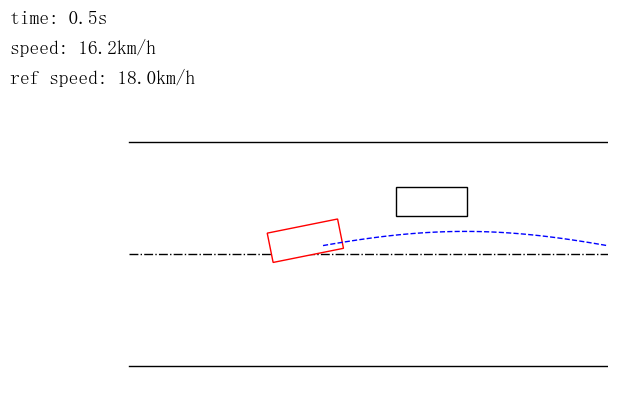

0.00021457672


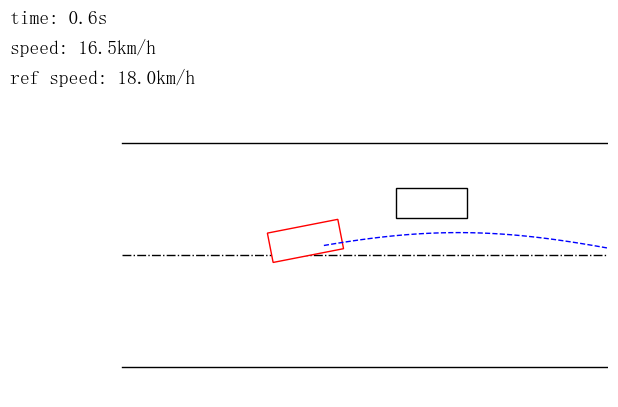

0.00021457672


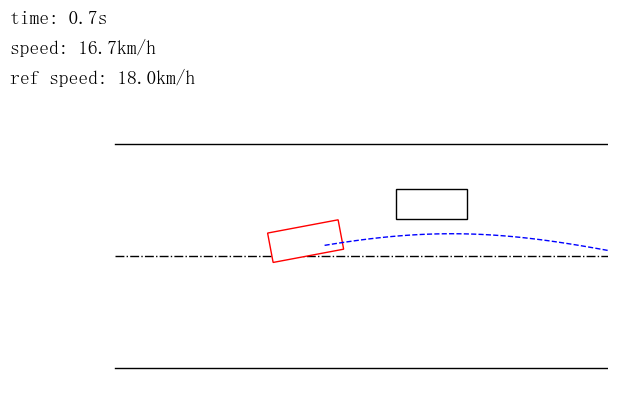

0.00021457672


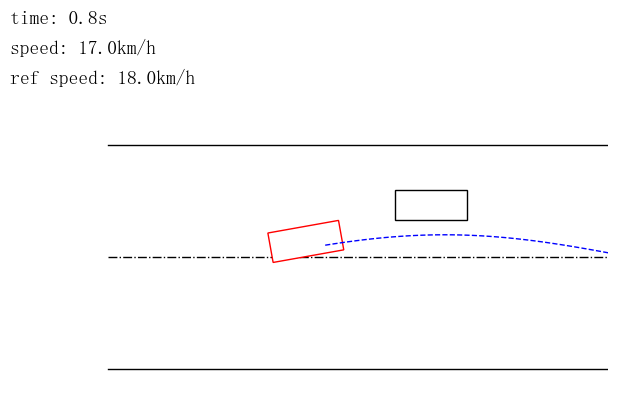

0.00021457672


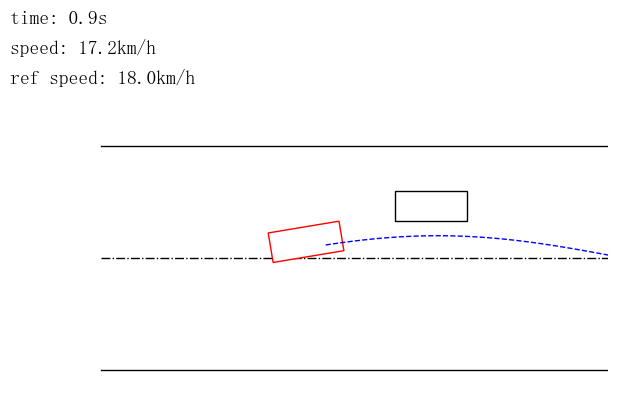

0.00021457672


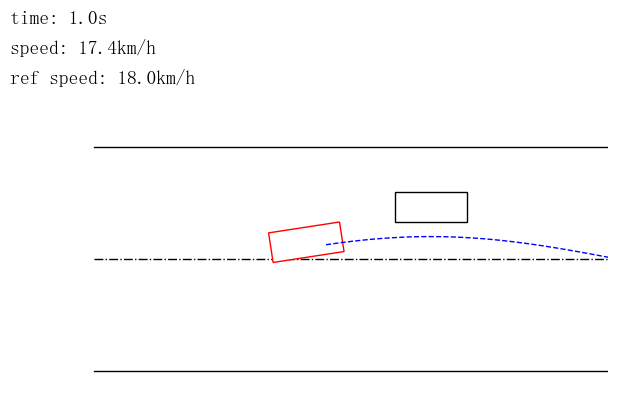

0.00021457672


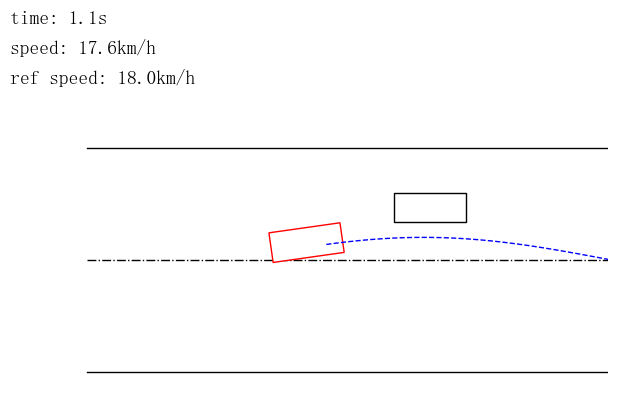

0.00021457672


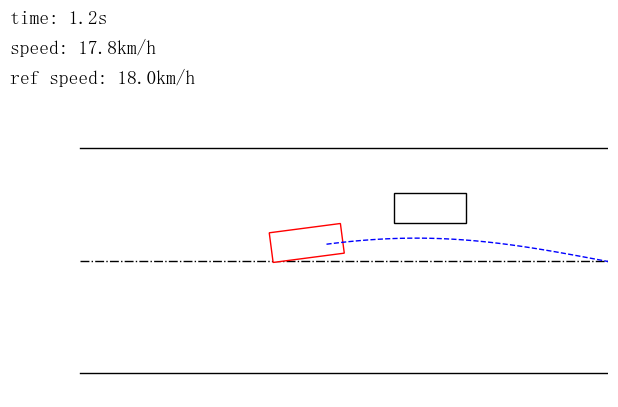

0.00021457672


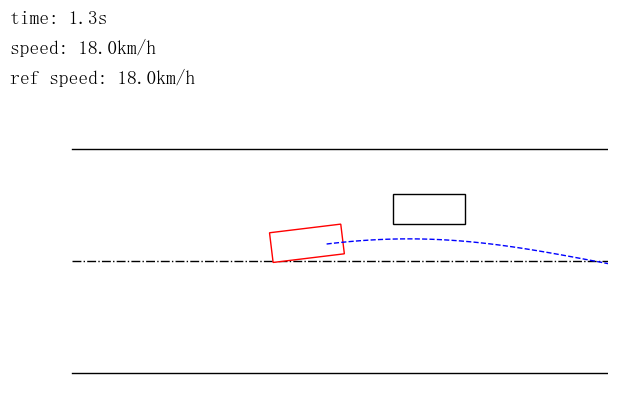

0.00021457672


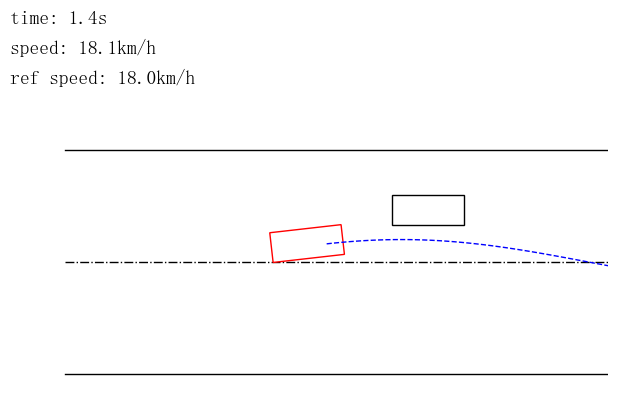

0.00021606684


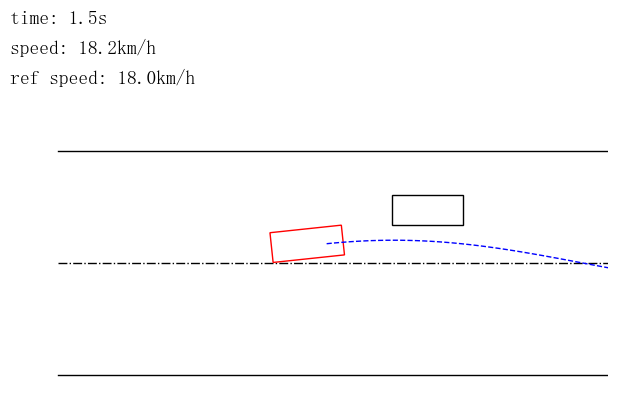

0.00021606684


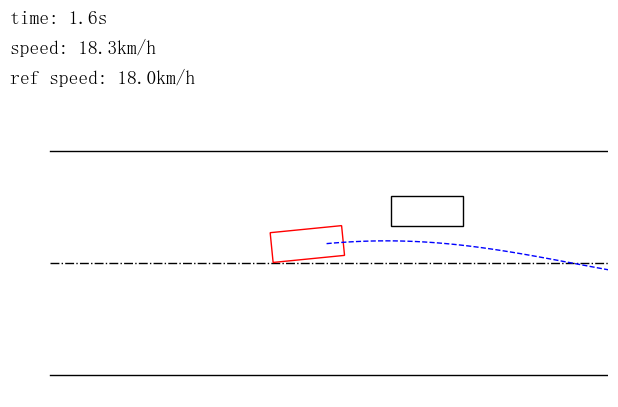

0.00021755695


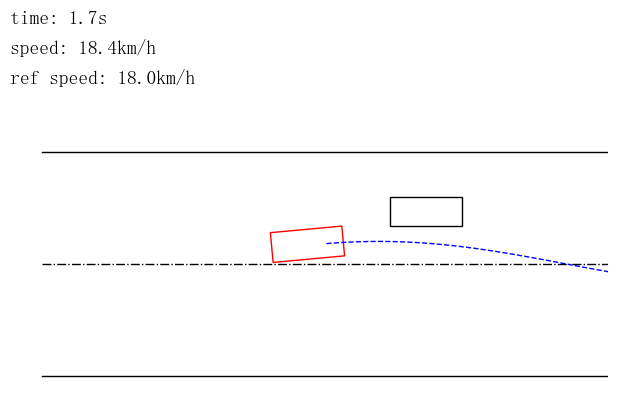

0.00021755695


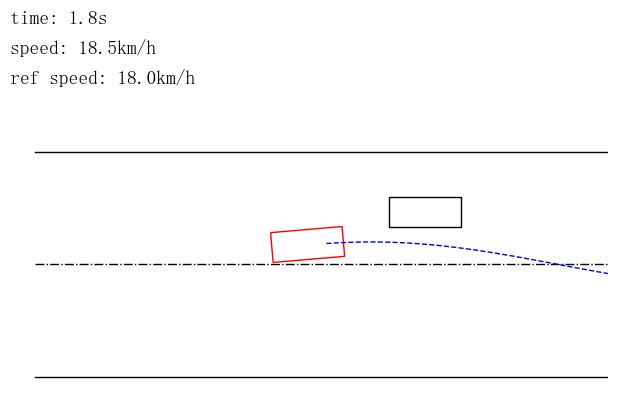

0.00021904707


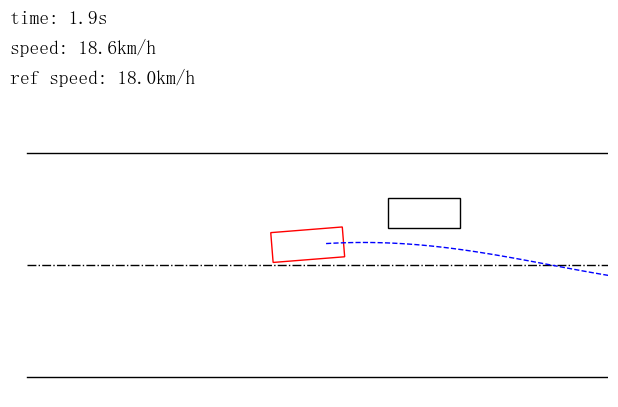

0.00022053719


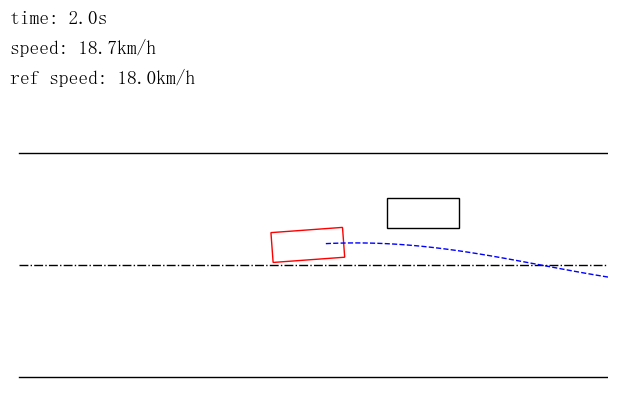

0.0002220273


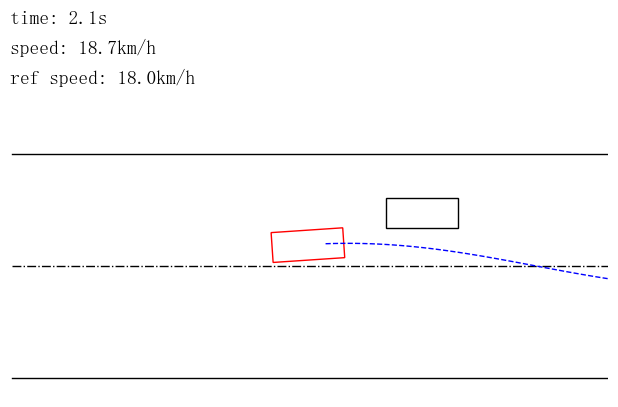

0.00022351742


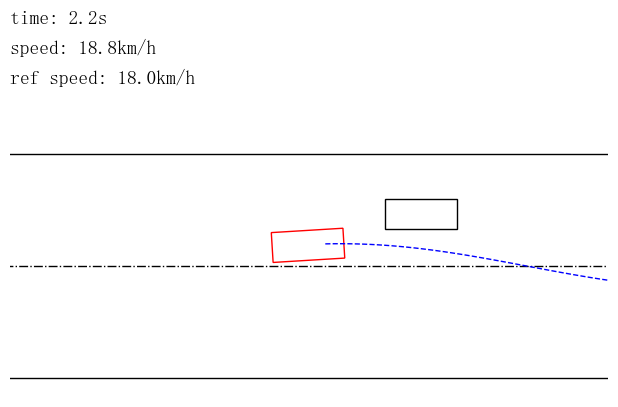

0.00022500753


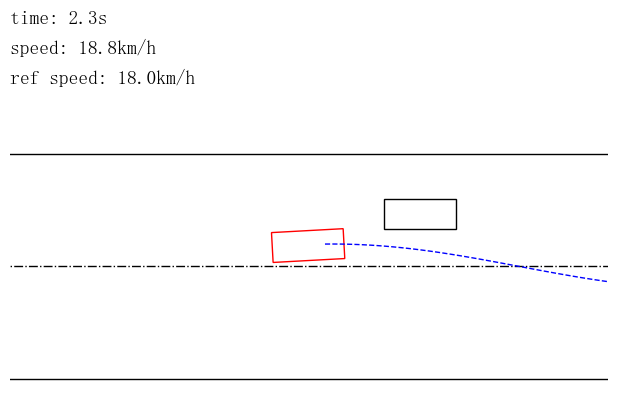

0.00022798777


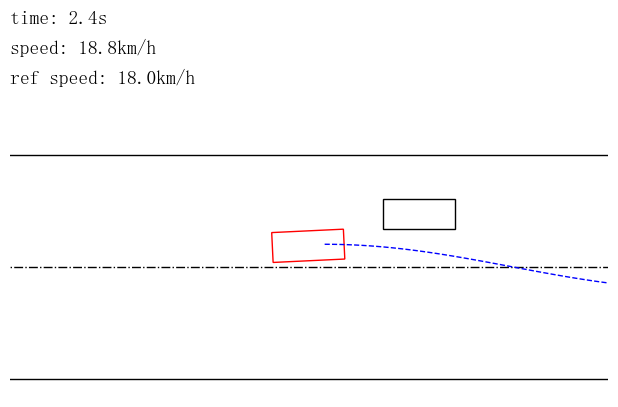

0.00022947788


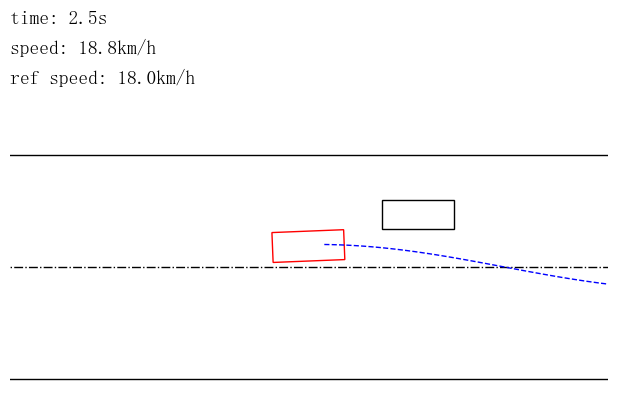

0.00023394823


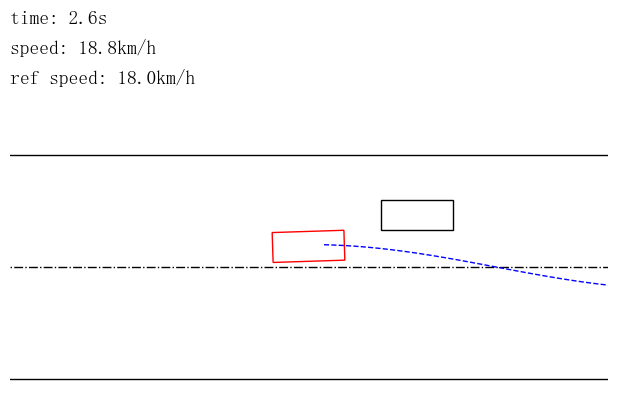

0.00023692846


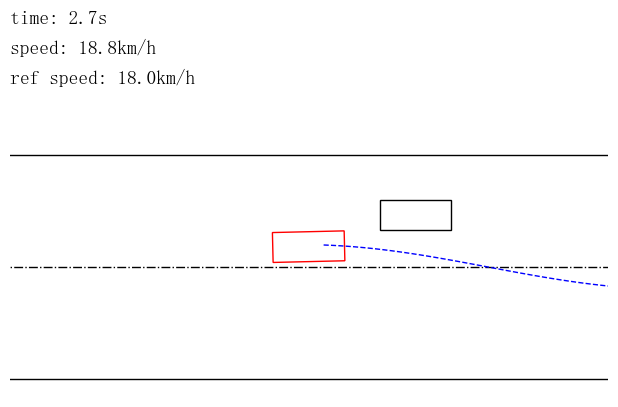

0.00024139881


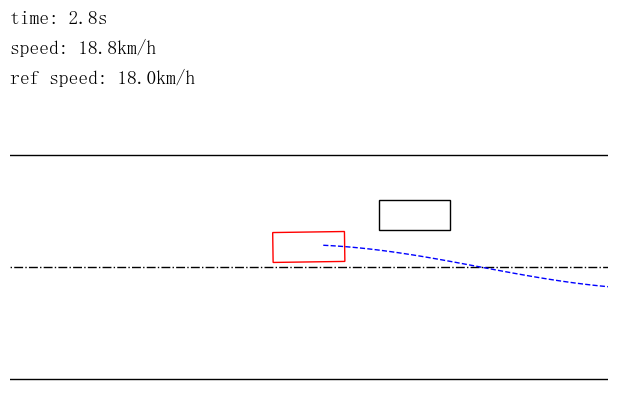

0.00024586916


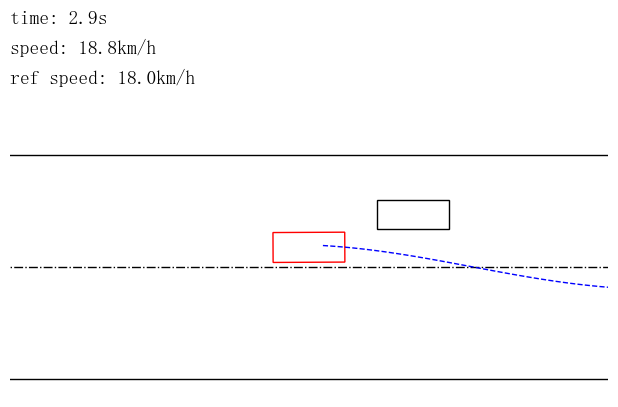

0.00025182962


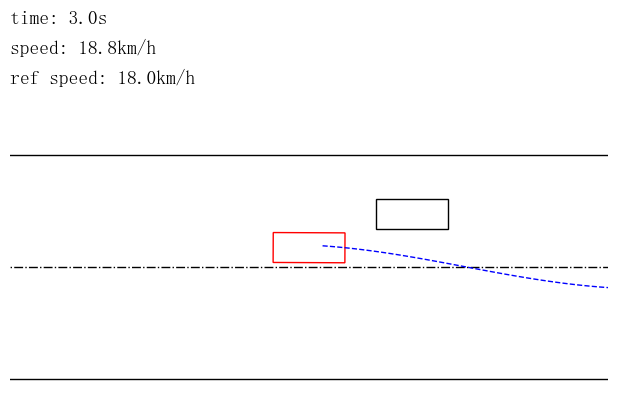

0.0002592802


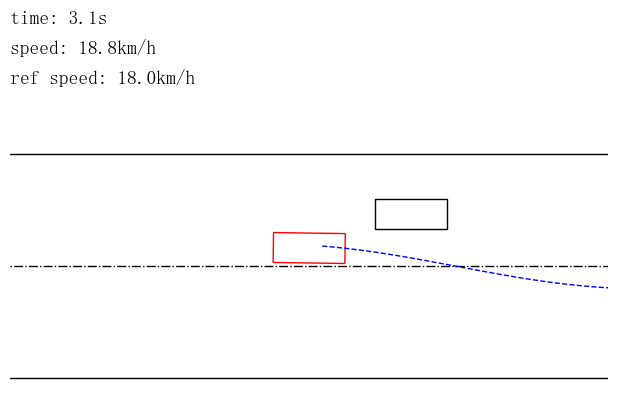

0.00026673079


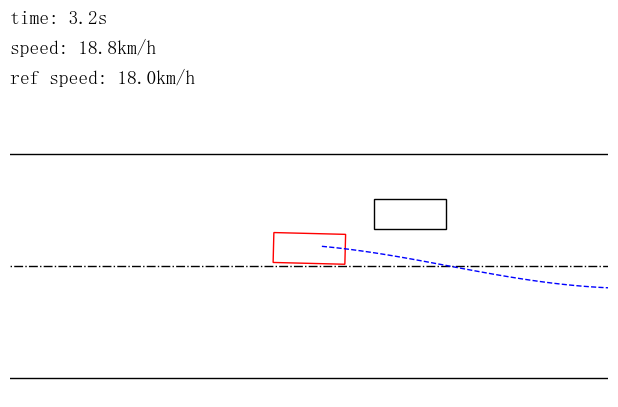

0.00027418137


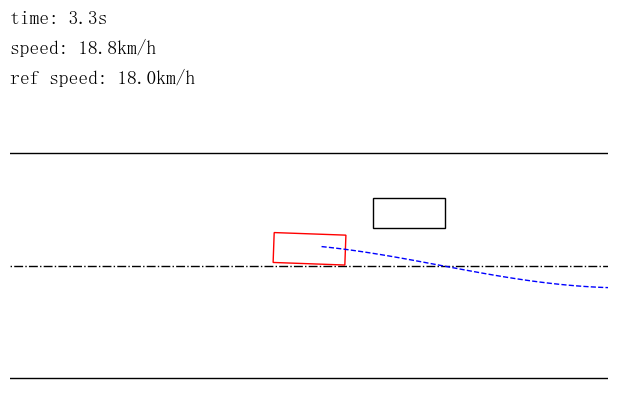

0.00028163195


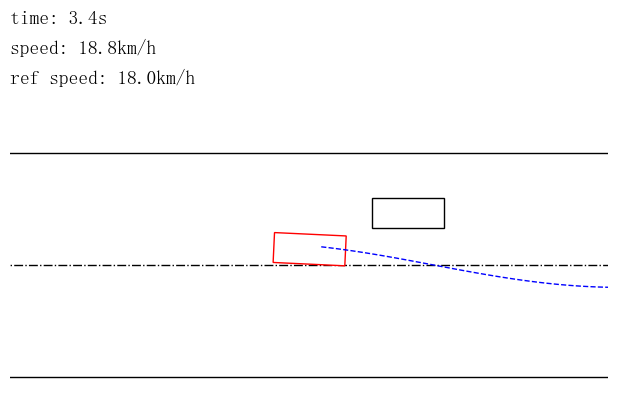

0.0002875924


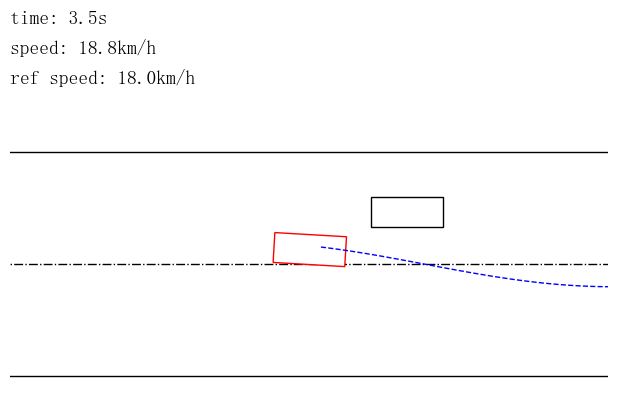

0.000295043


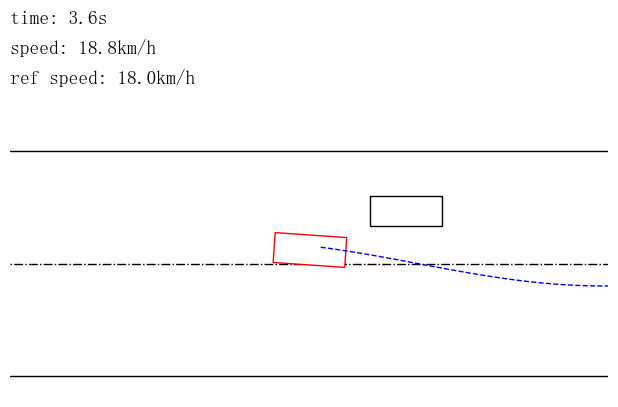

0.00030100346


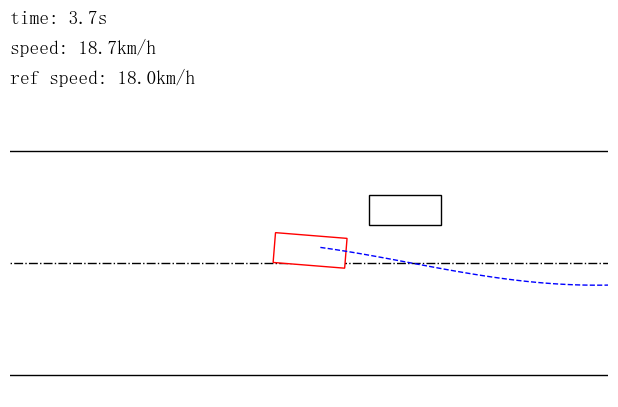

0.0003039837


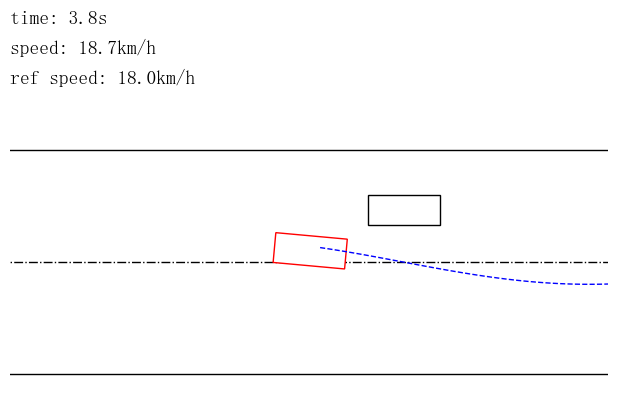

0.0003039837


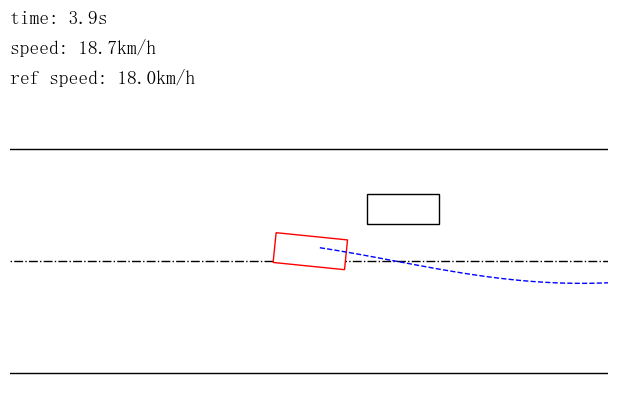

0.00030100346


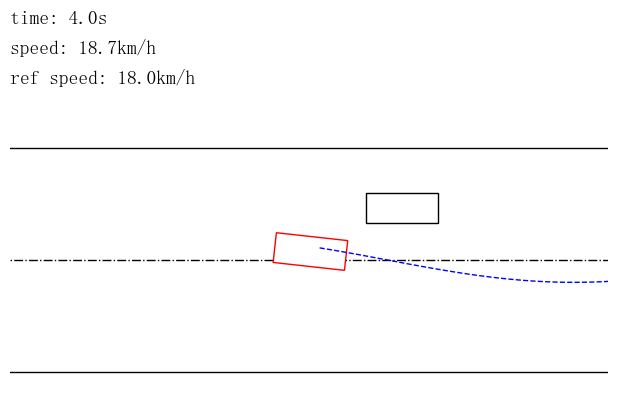

0.00029802322


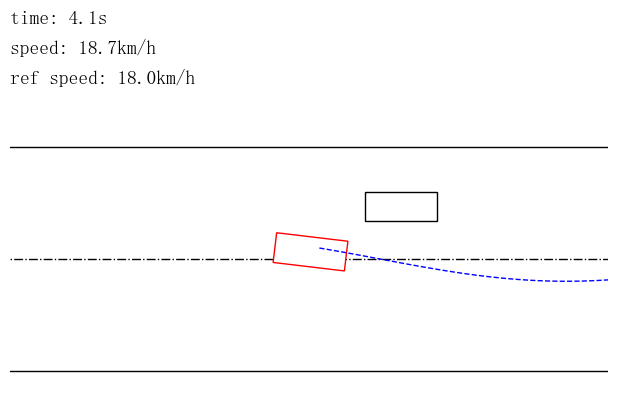

0.00029206276


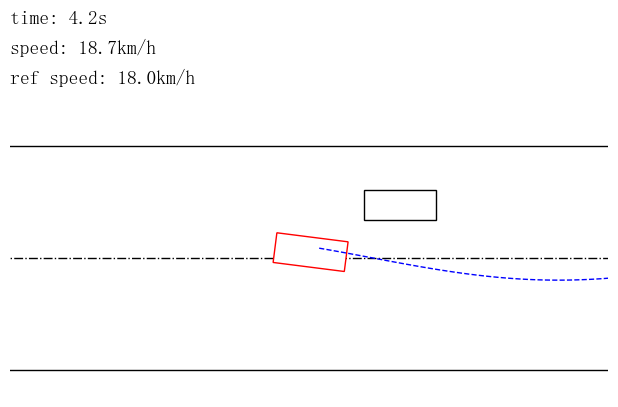

0.00028461218


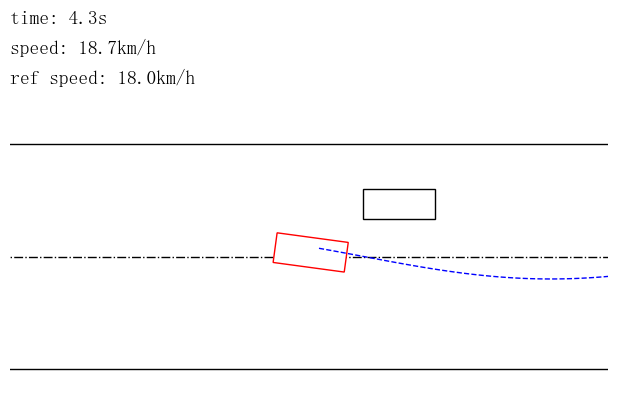

0.0002786517


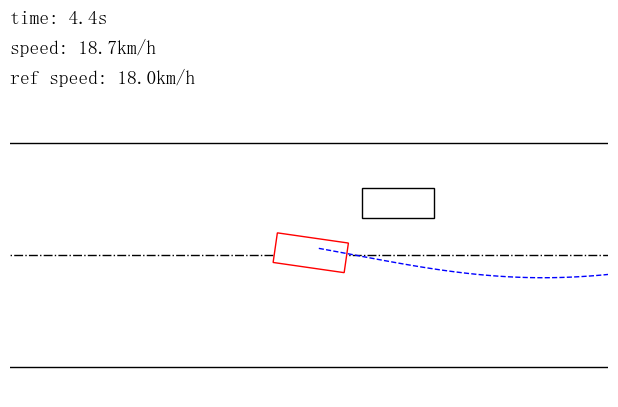

0.00027120113


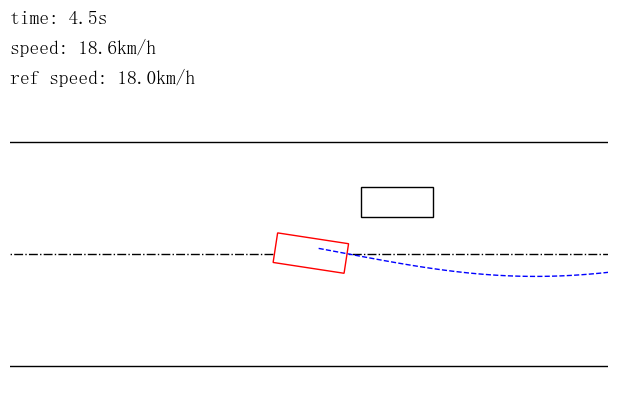

0.00026226044


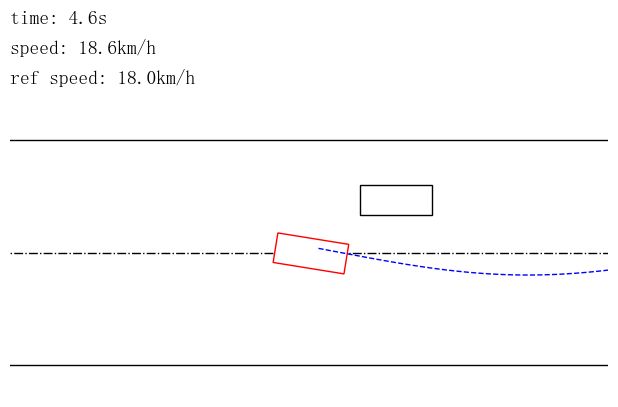

0.00025629997


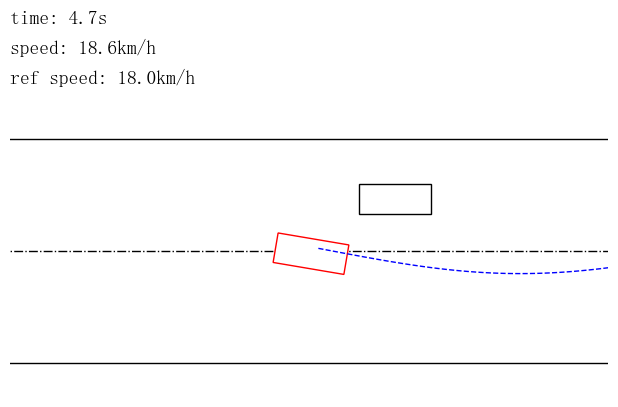

0.0002503395


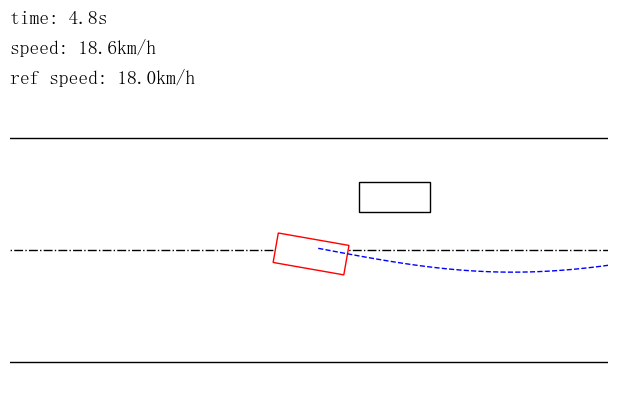

0.00024586916


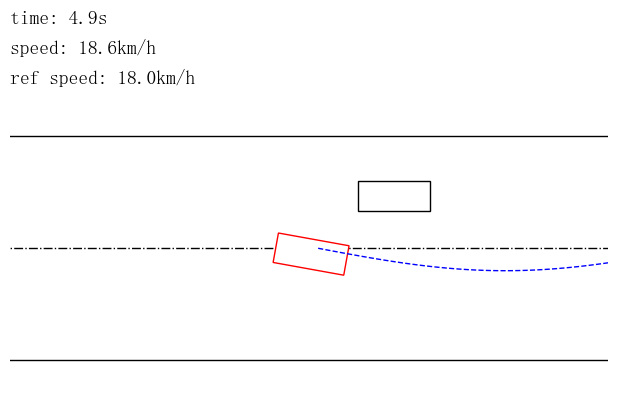

0.00024139881


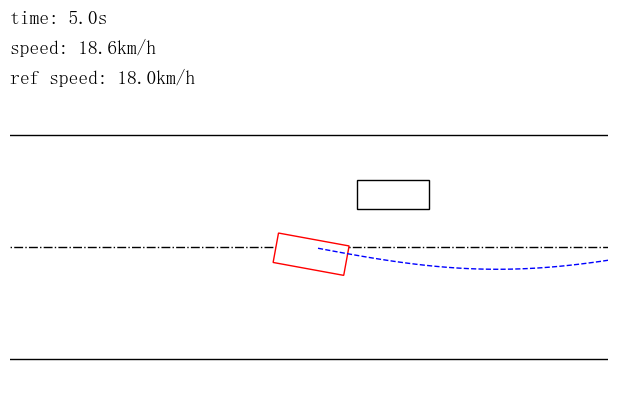

0.00023841858


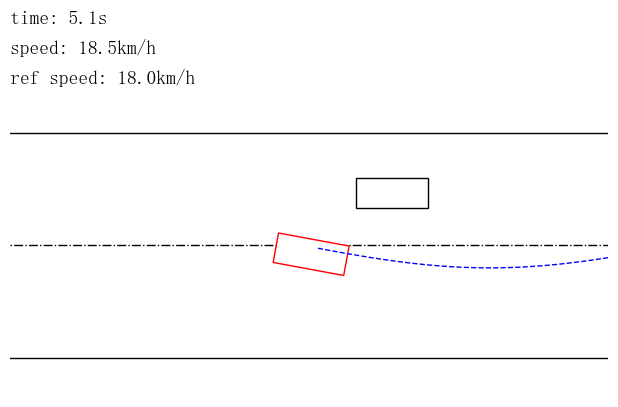

0.00023543835


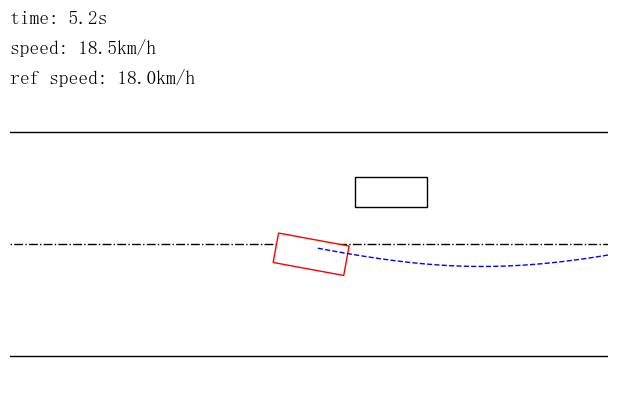

0.00023394823


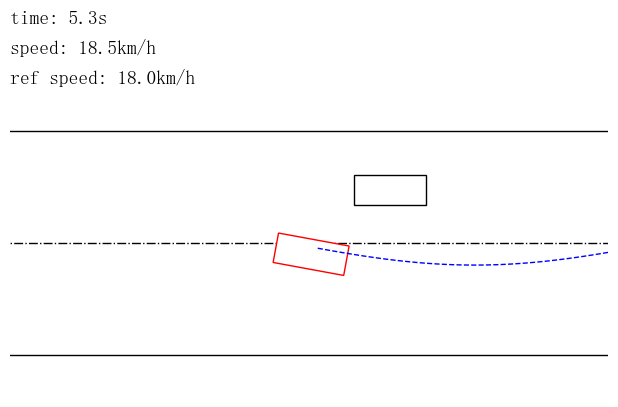

0.000230968


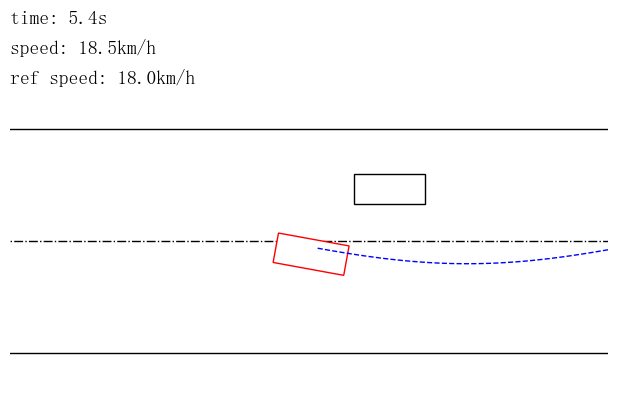

0.00022947788


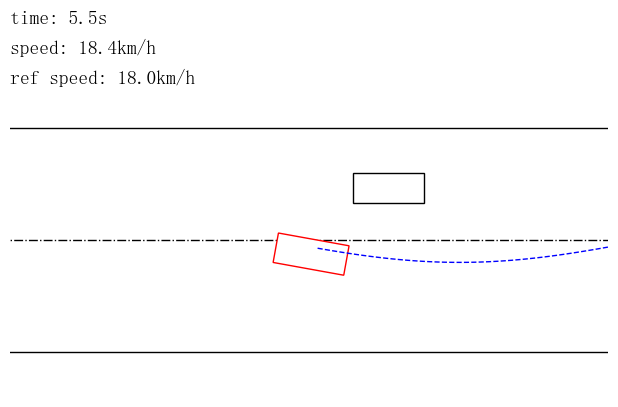

0.00022798777


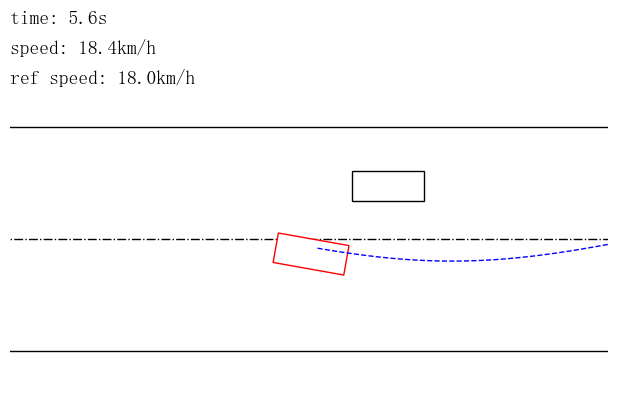

0.00022649765


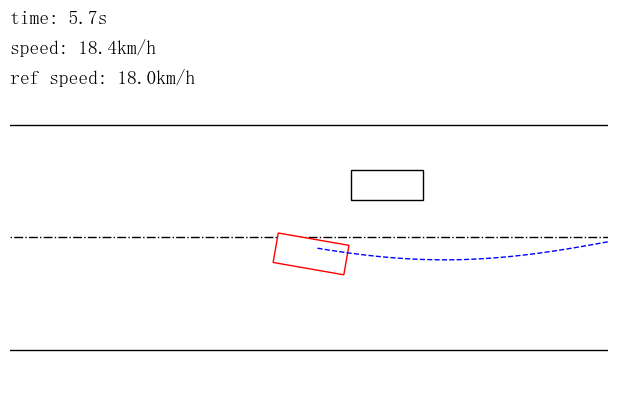

0.00022500753


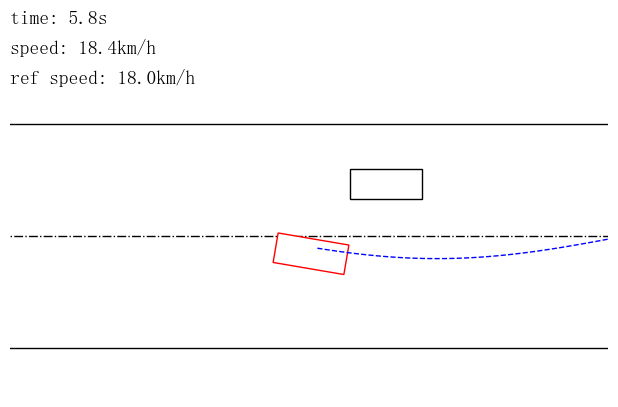

0.00022500753


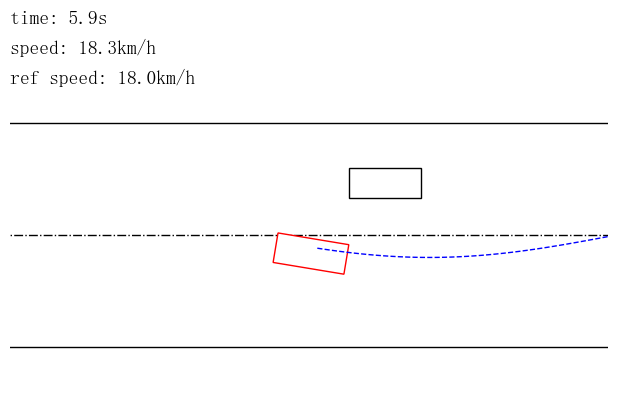

0.00022351742


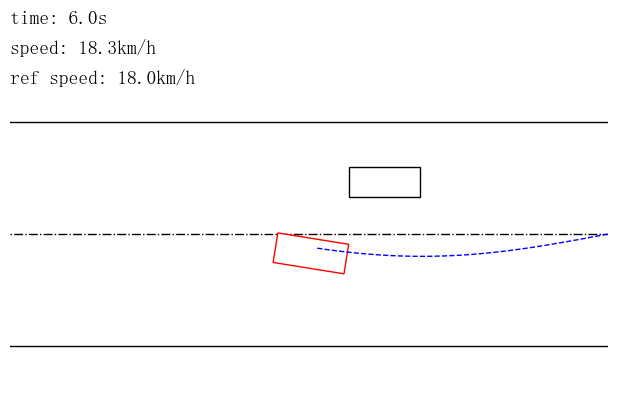

0.00022351742


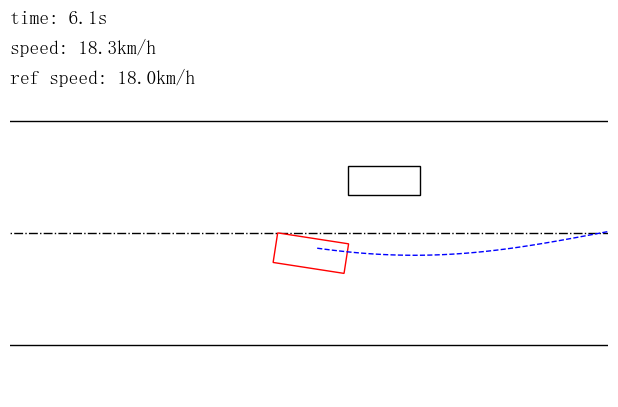

0.00022351742


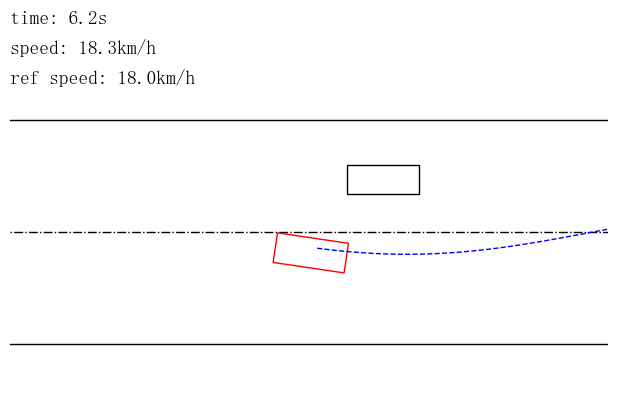

0.00022351742


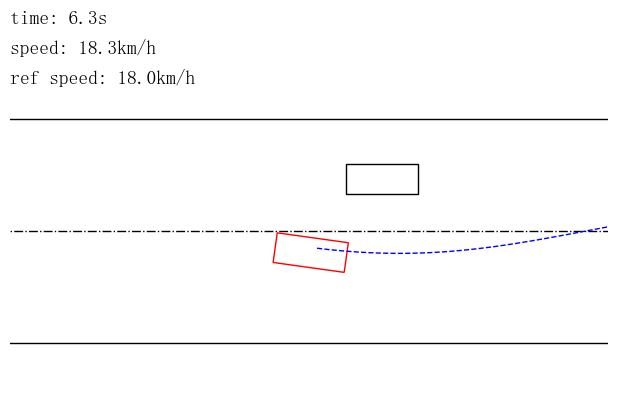

0.00022351742


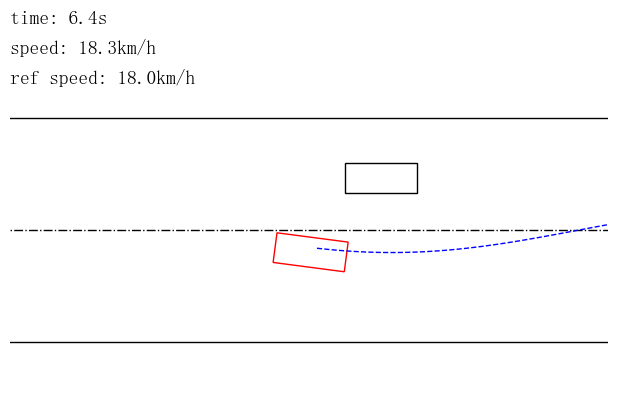

0.0002220273


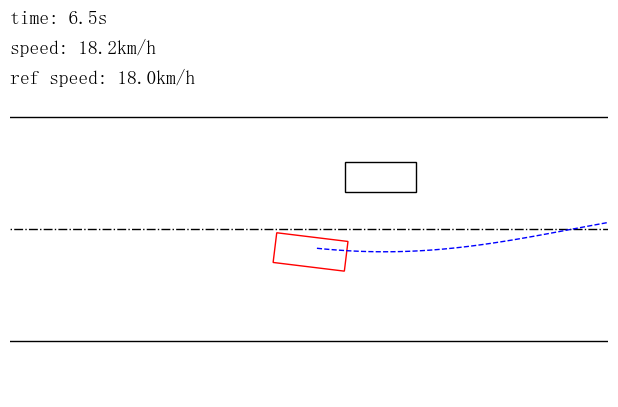

0.0002220273


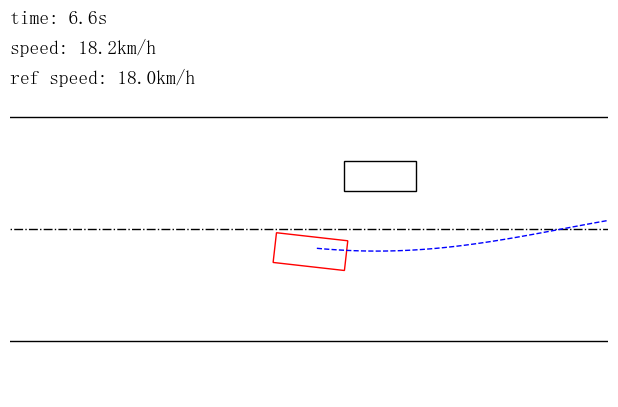

0.0002220273


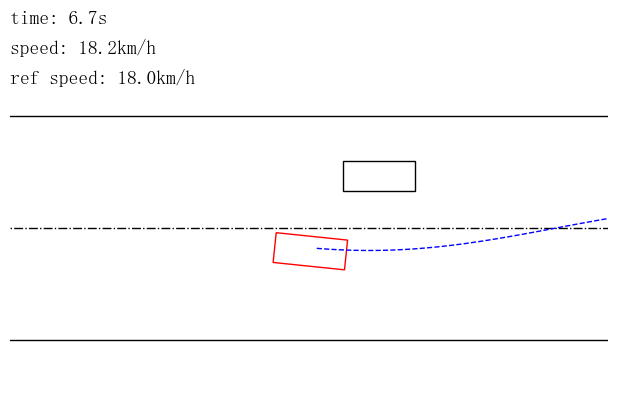

0.0002220273


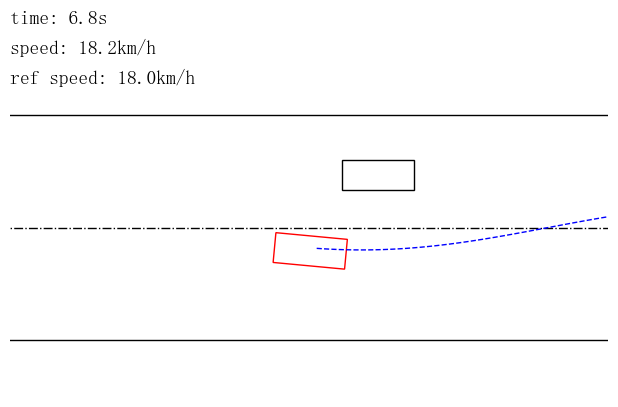

0.0002220273


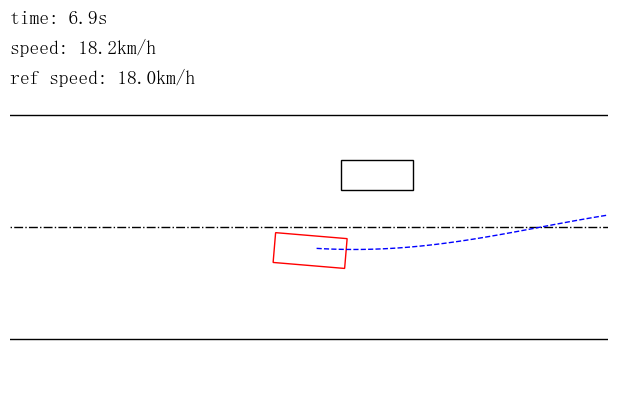

0.00022351742


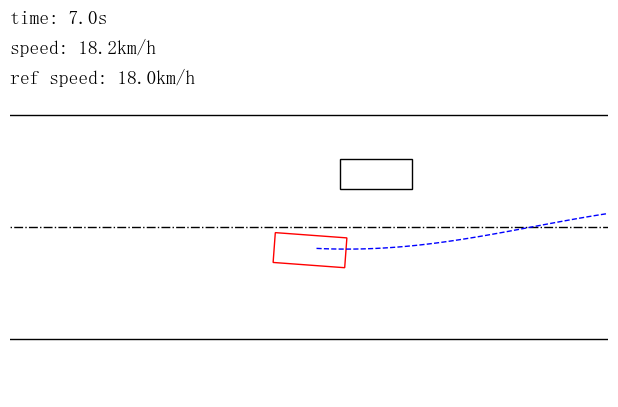

0.00022351742


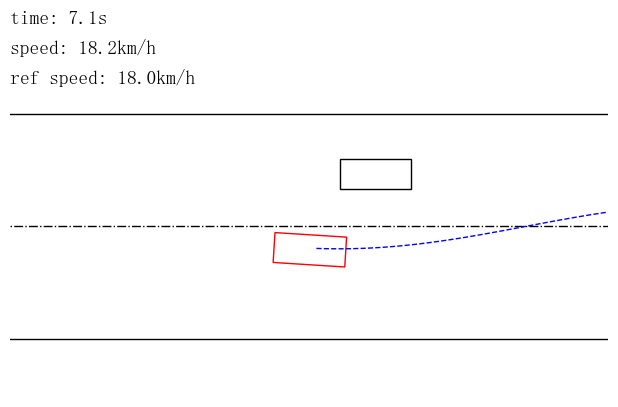

0.00022351742


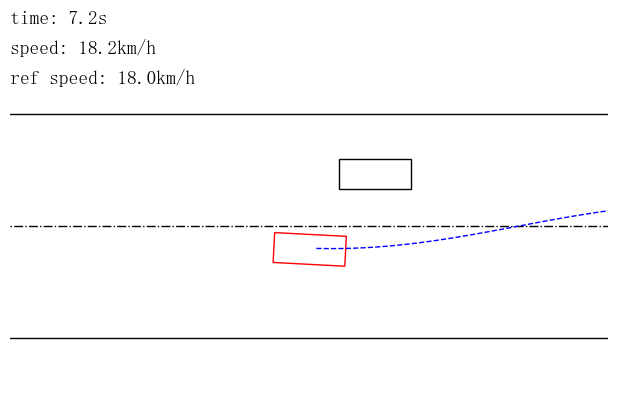

0.00022351742


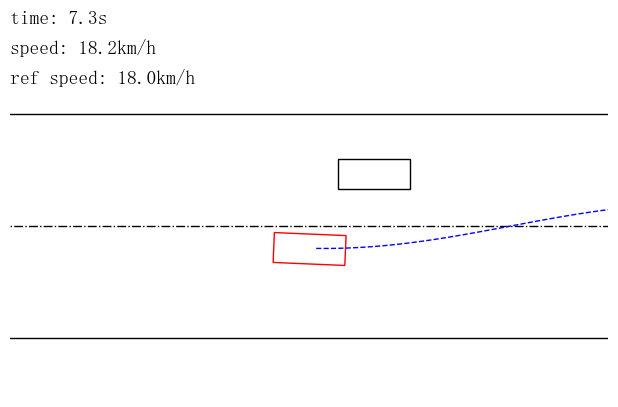

0.00022500753


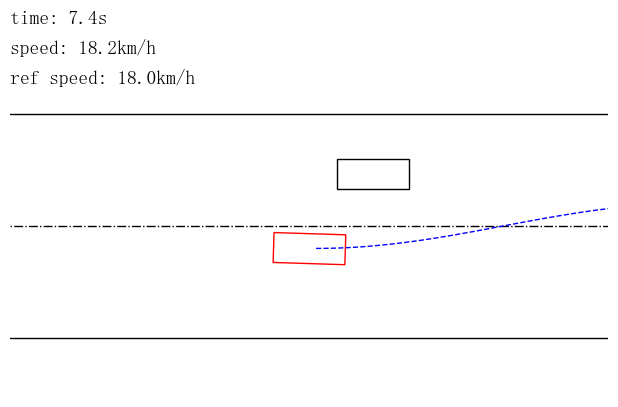

0.00022500753


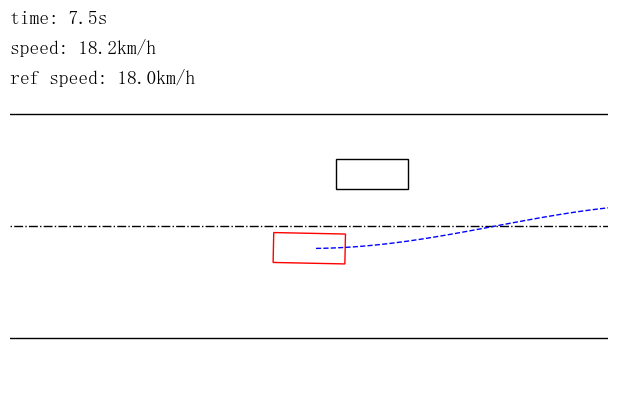

0.00022649765


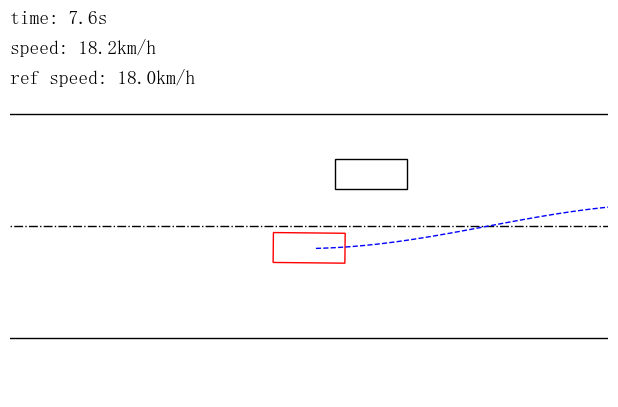

0.00022649765


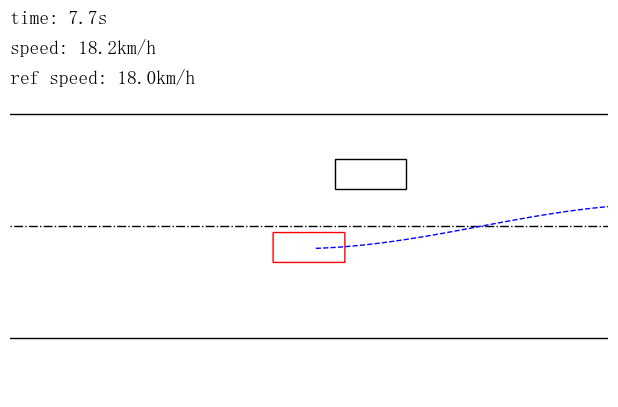

0.00022798777


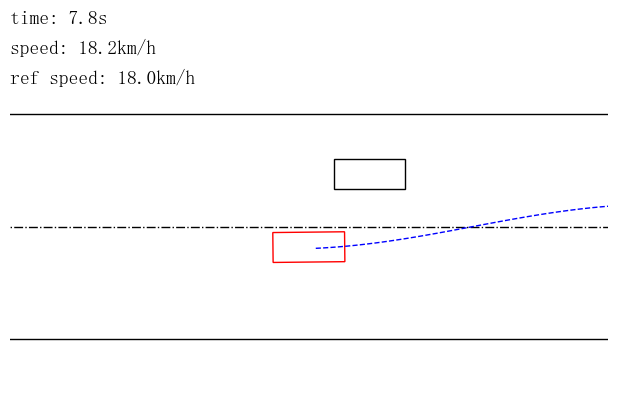

0.00022947788


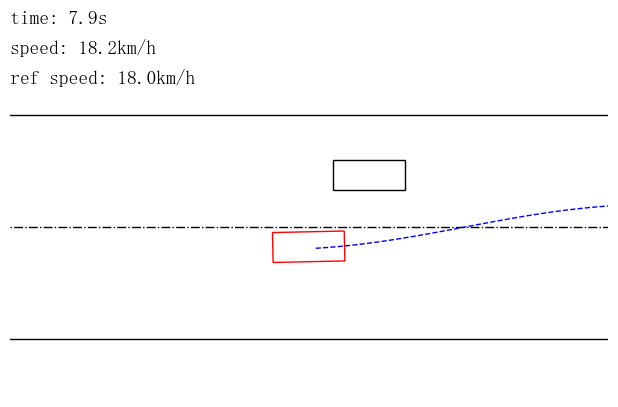

0.00023245811


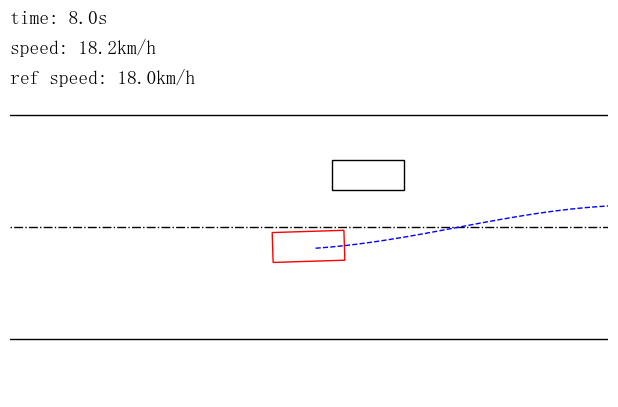

0.00023543835


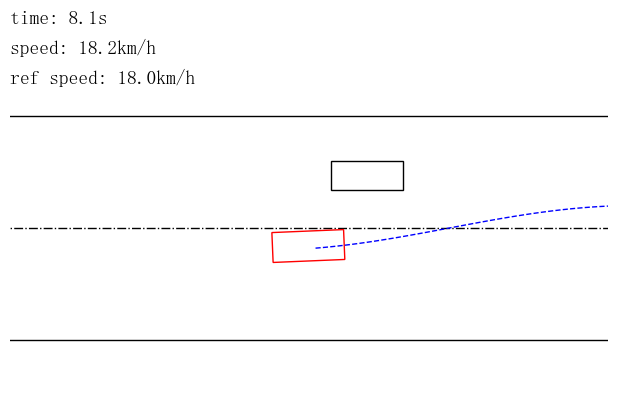

0.00023841858


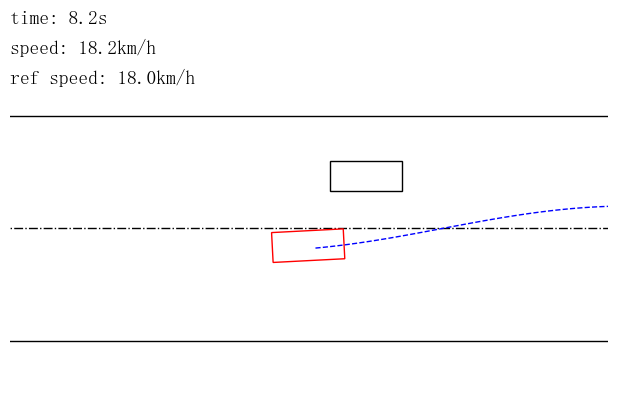

0.00024288893


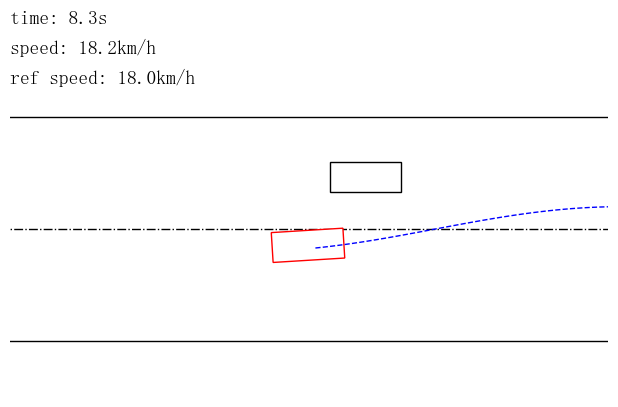

0.0002488494


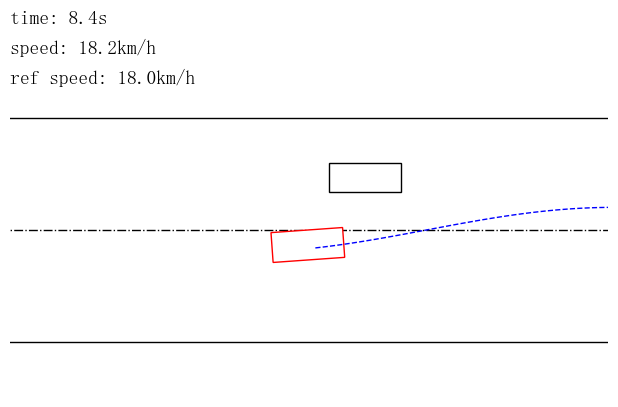

0.00025629997


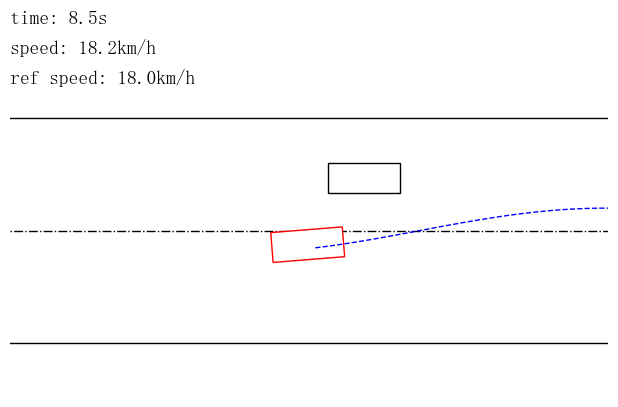

0.0002682209


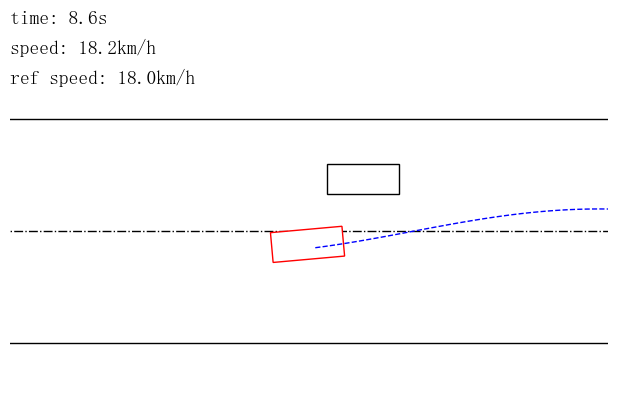

0.00028461218


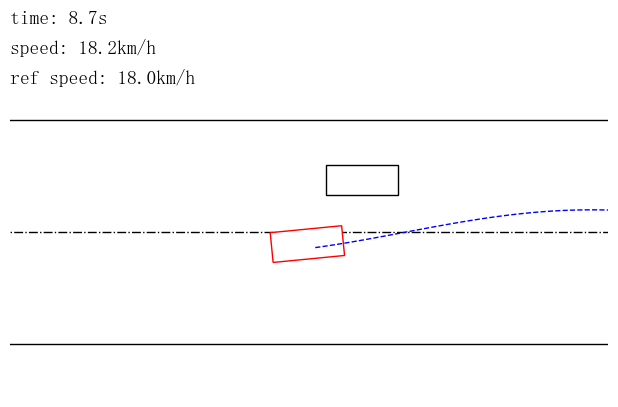

0.00030845404


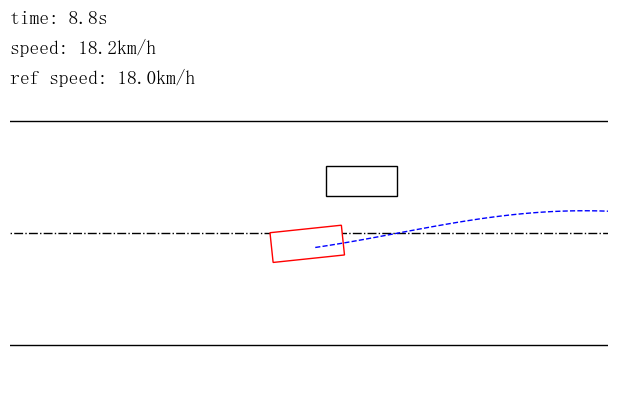

0.00034421682


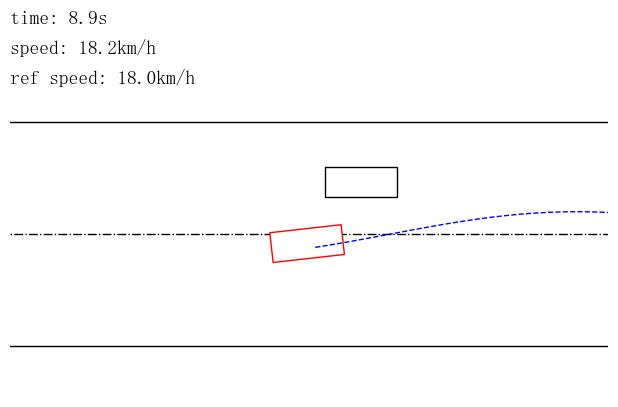

0.0003963709


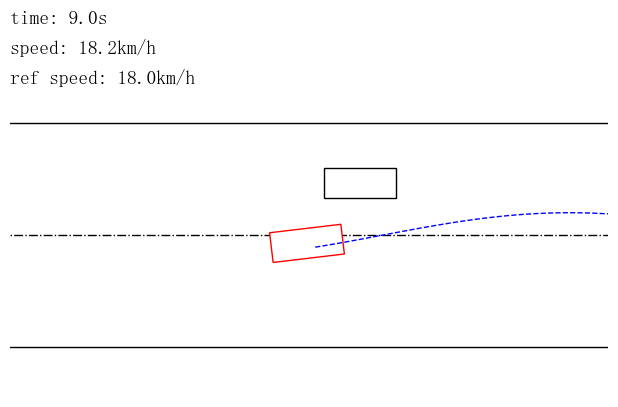

0.00046044588


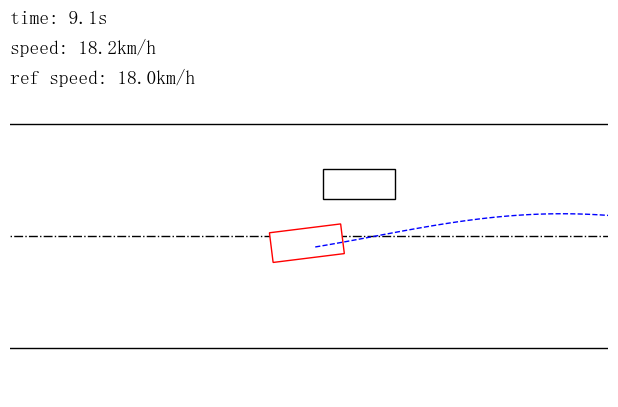

0.0005275011


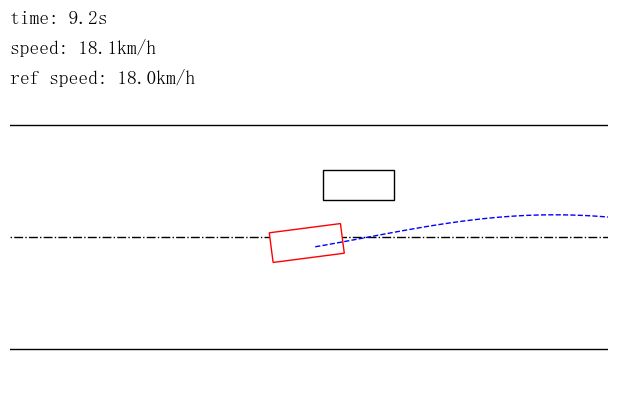

0.00058561563


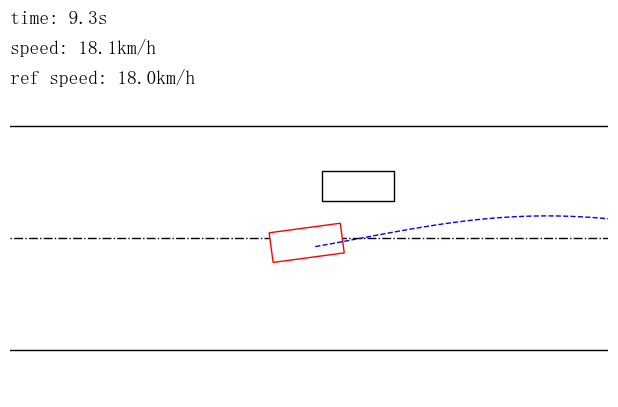

0.00062435865


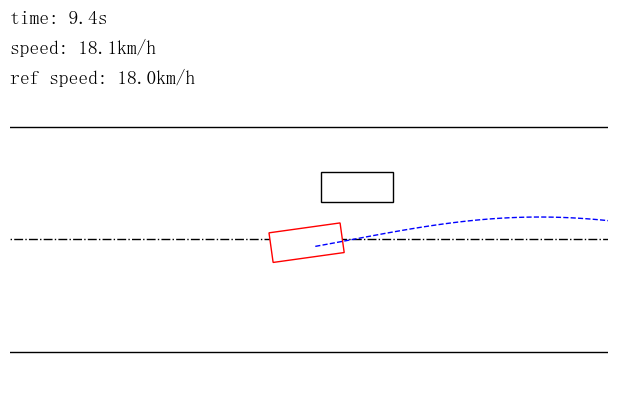

0.0006467104


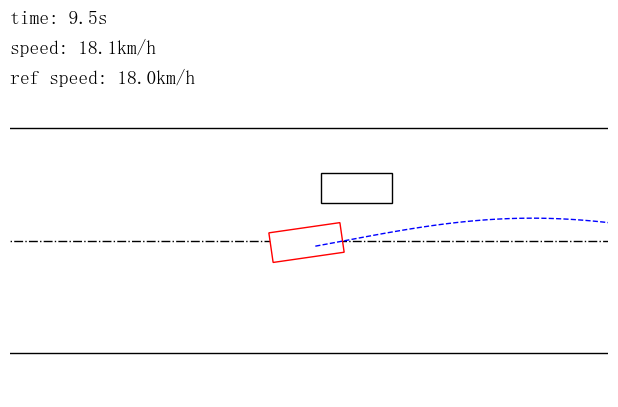

0.00066161156


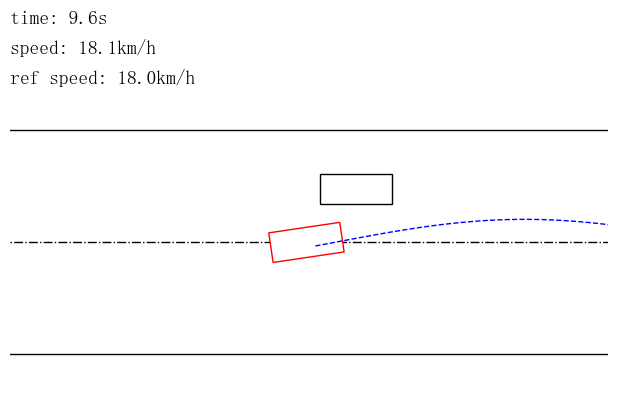

0.00067204237


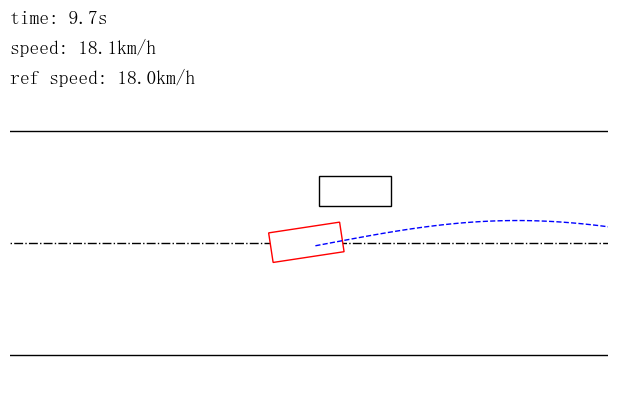

0.00068098307


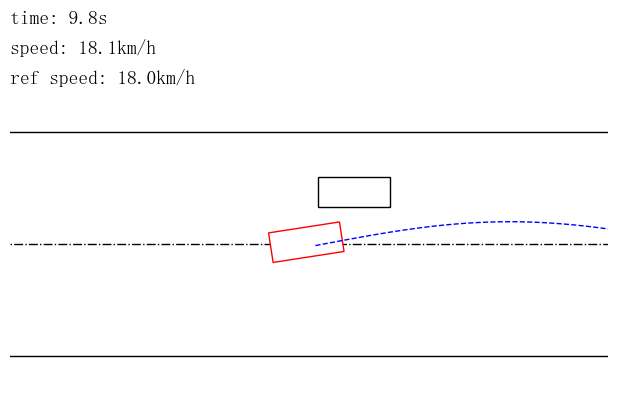

0.0006914139


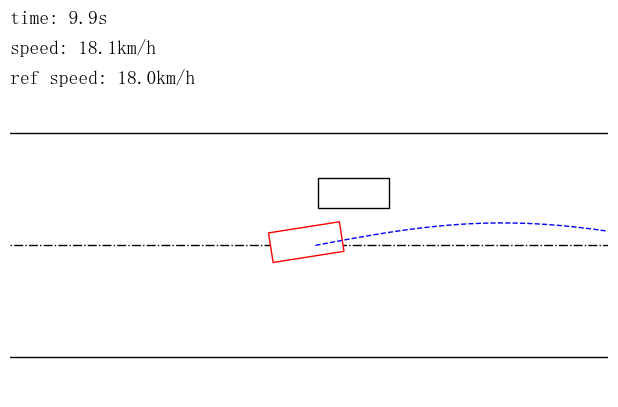

0.0007033348


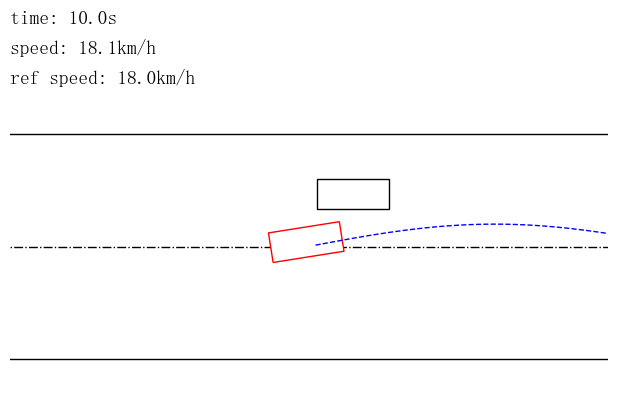

0.00071823597


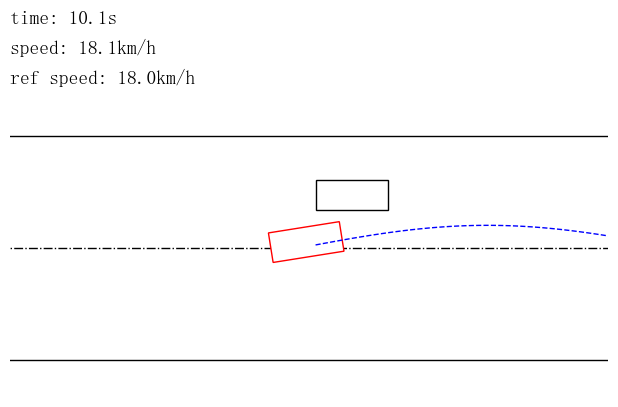

0.0007376075


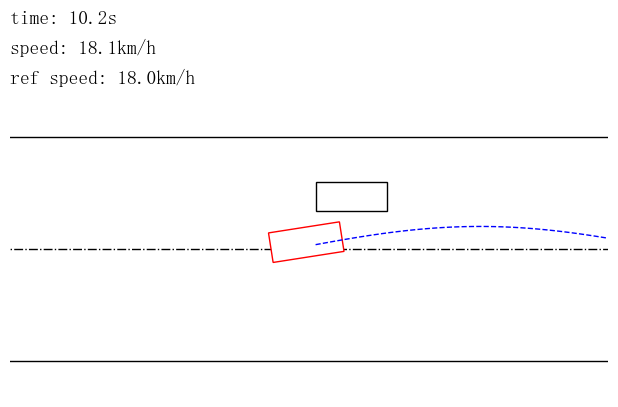

0.0007688999


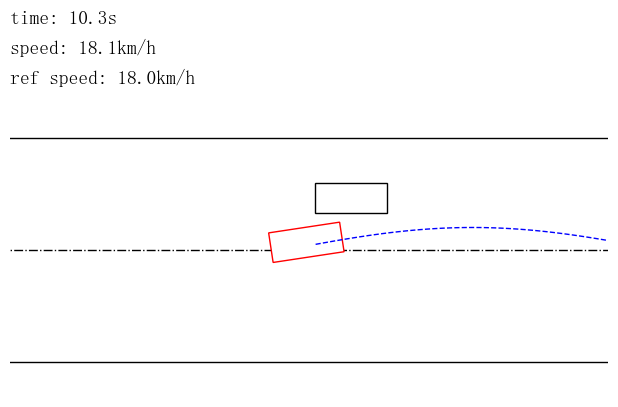

0.0008240342


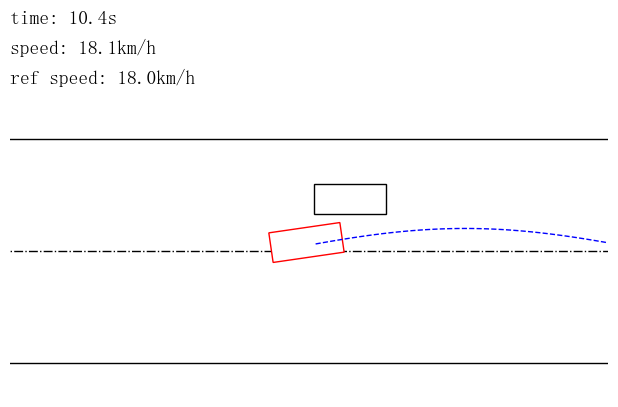

0.00094771385


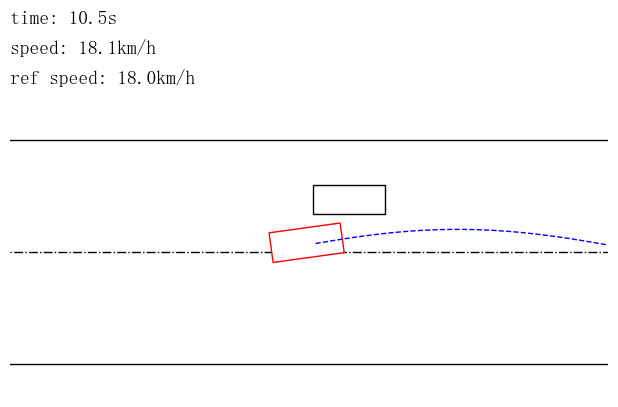

0.001271069


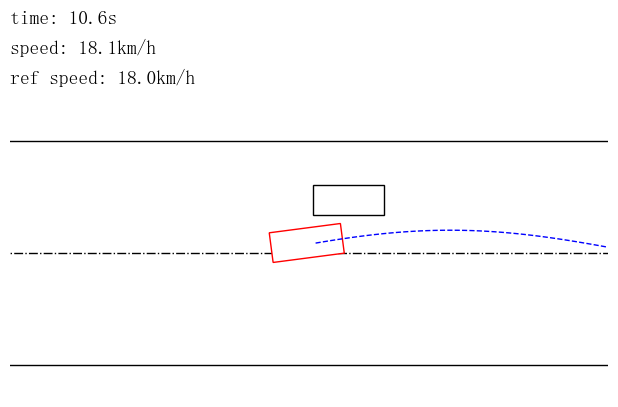

0.0023320317


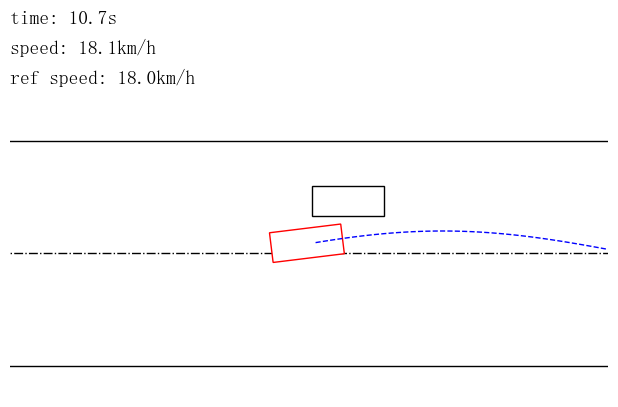

0.009210408


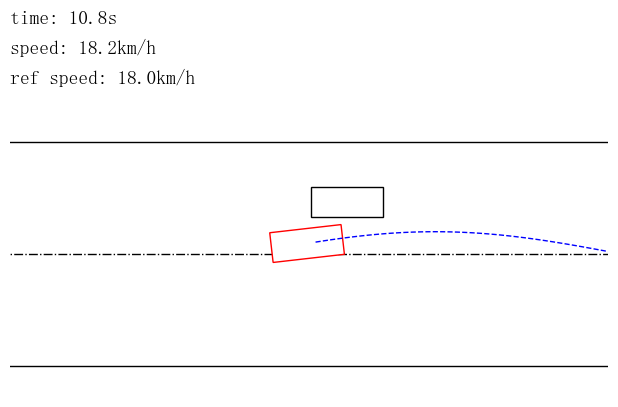

0.116211176


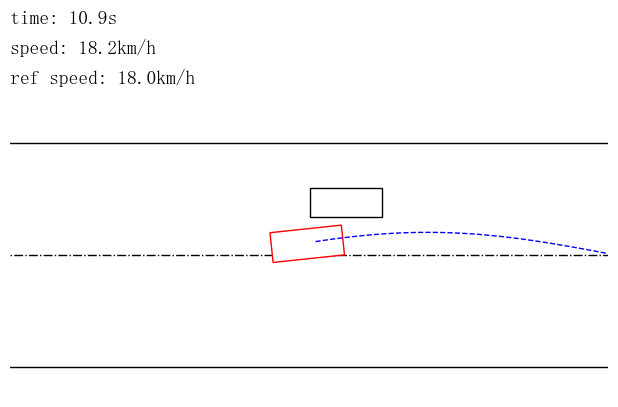

2.292922


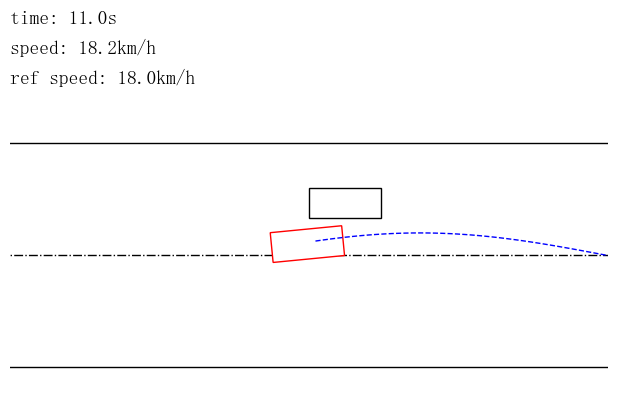

16.241364


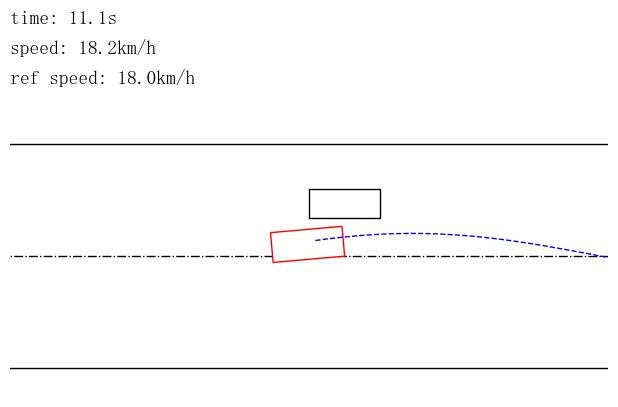

32.509876


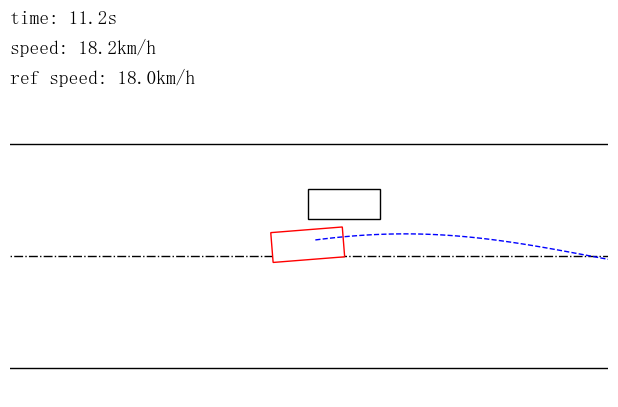

33.96213


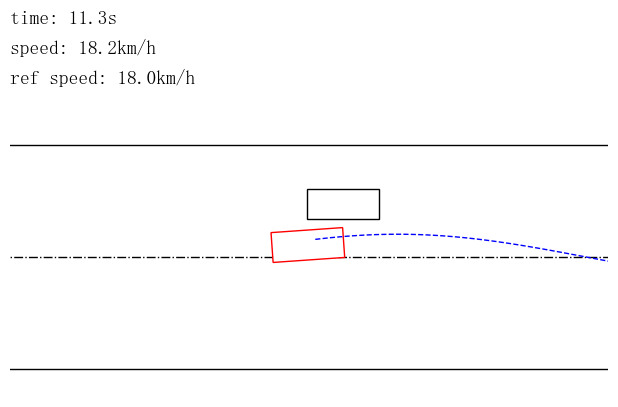

22.234865


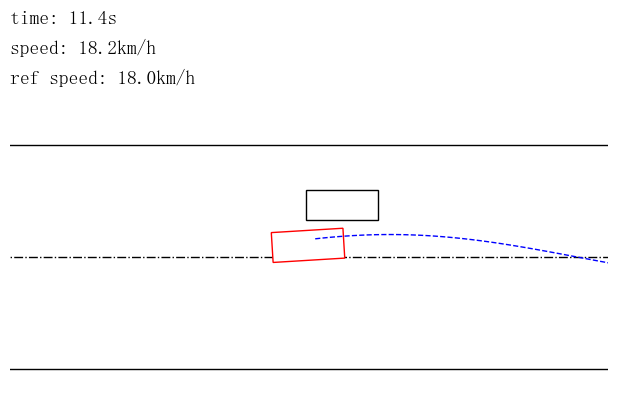

9.600735


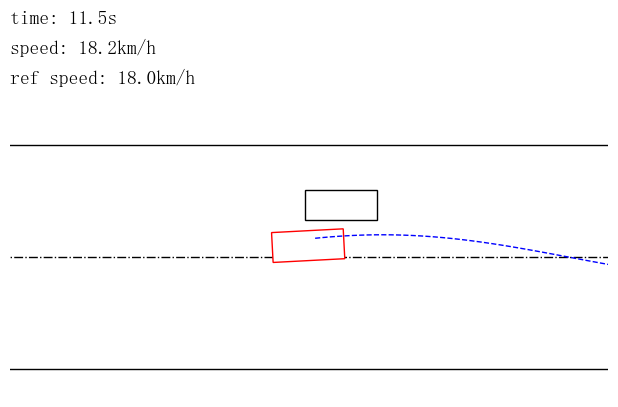

2.1264062


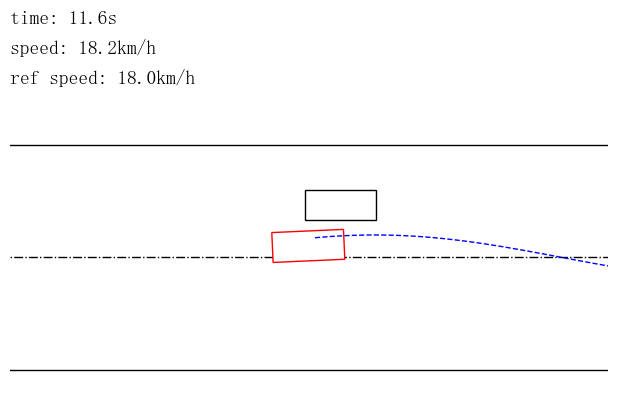

0.30577332


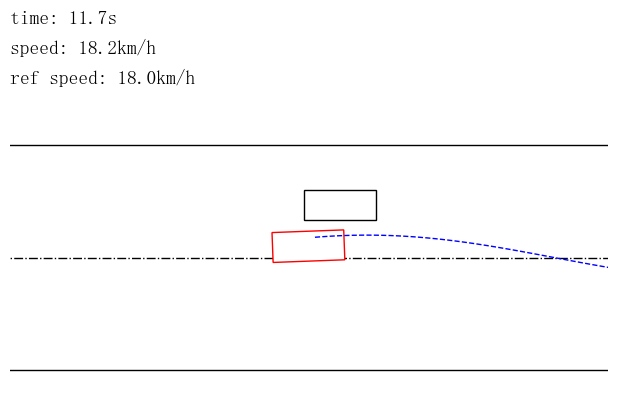

0.043305755


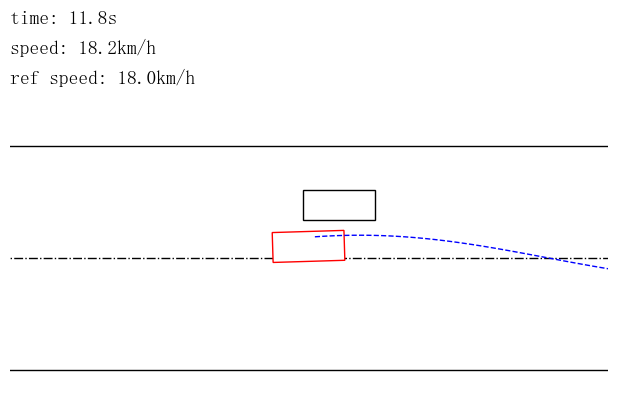

0.012730062


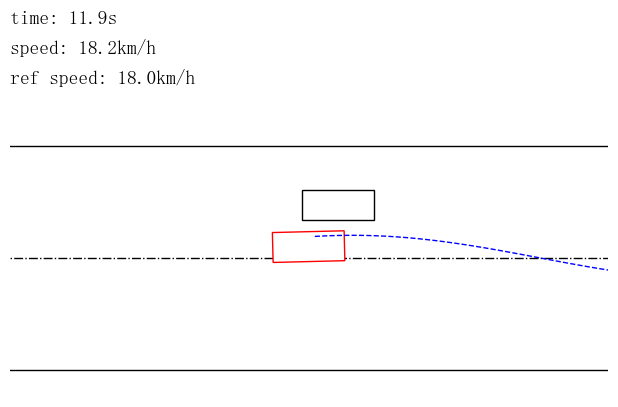

0.007431209


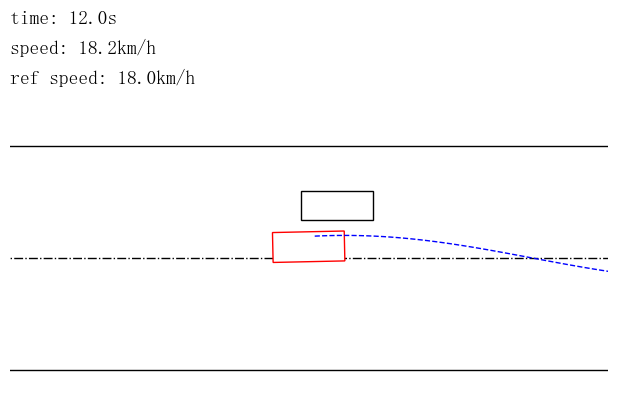

0.0054195523


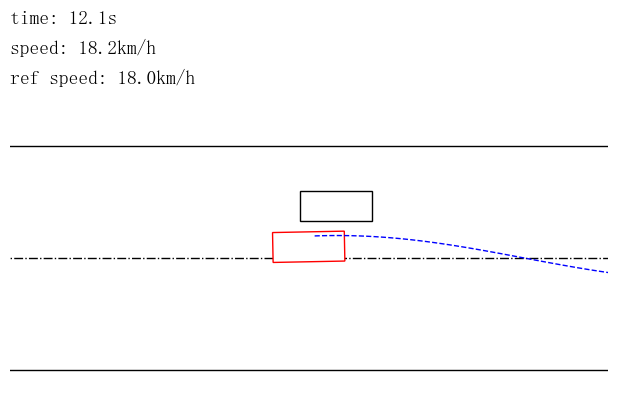

0.004413724


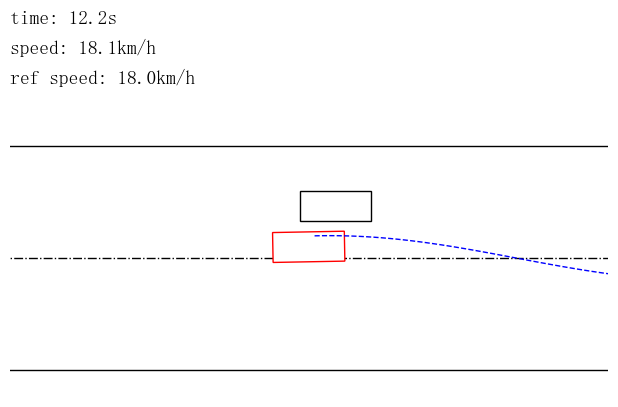

0.0037893653


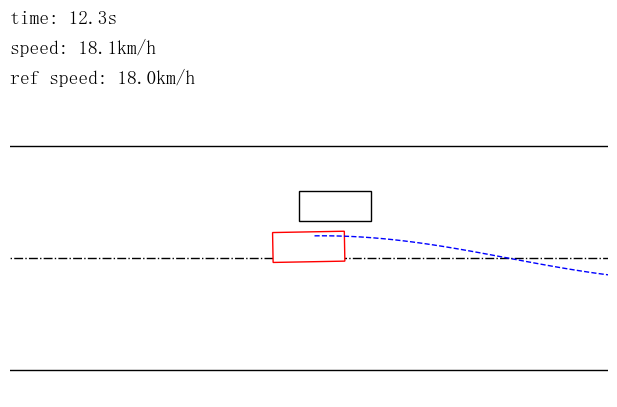

0.0032797456


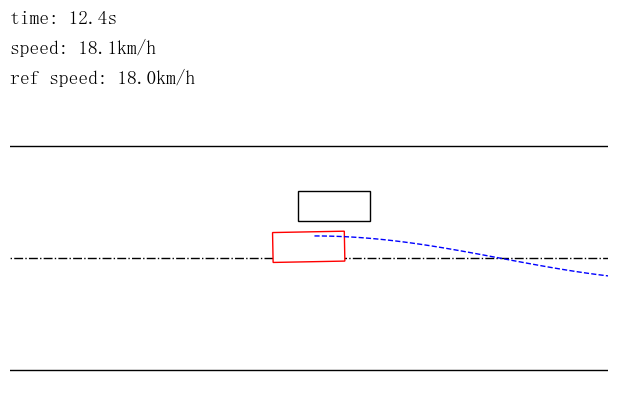

0.0027552247


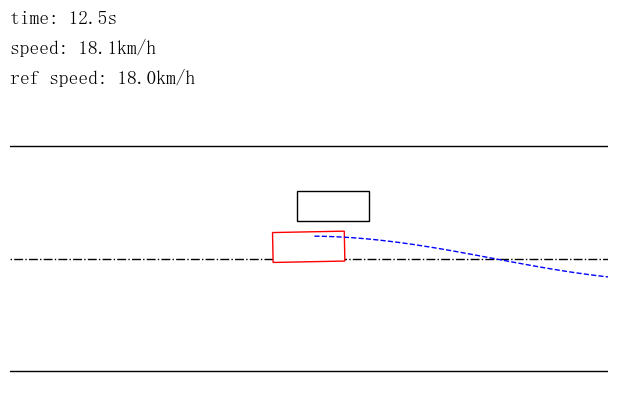

0.0023767352


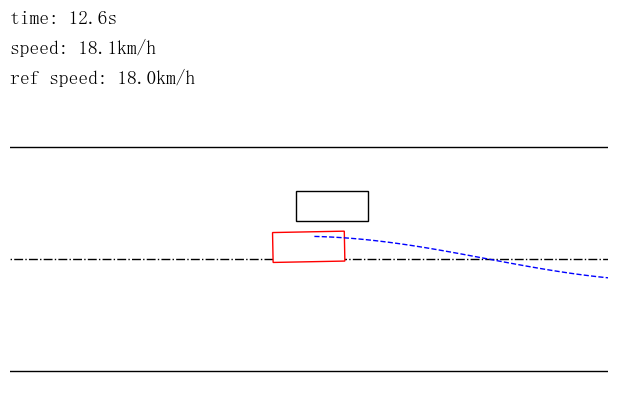

0.0021472573


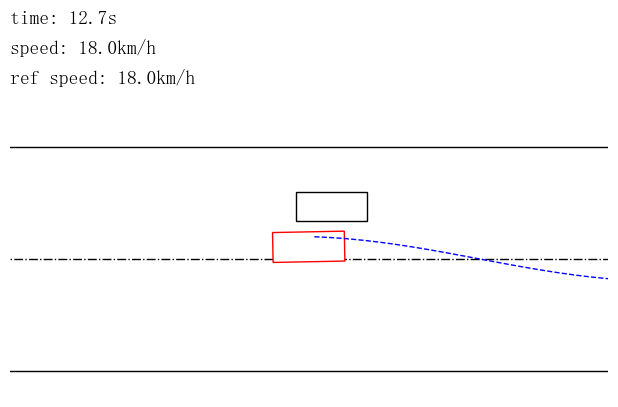

0.0024065375


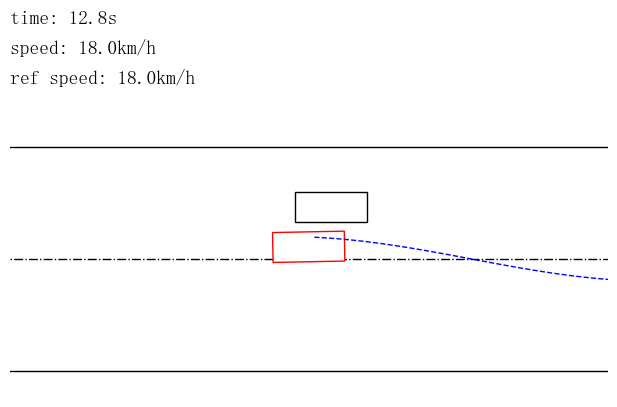

0.0032961369


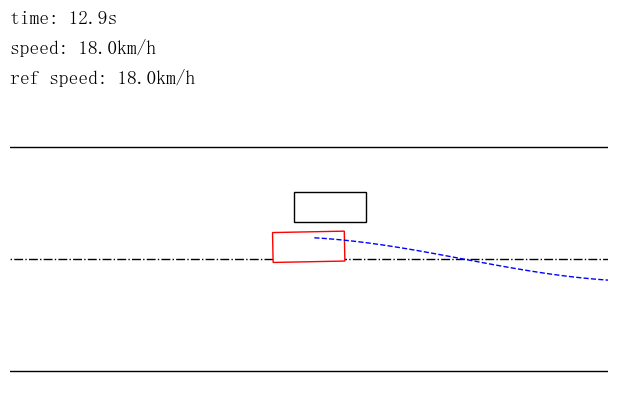

0.0047817826


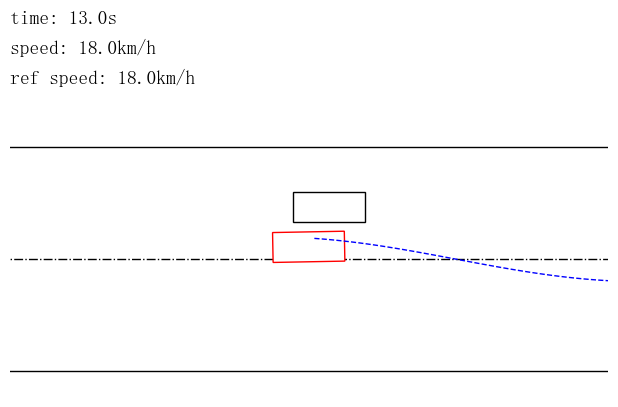

0.012409687


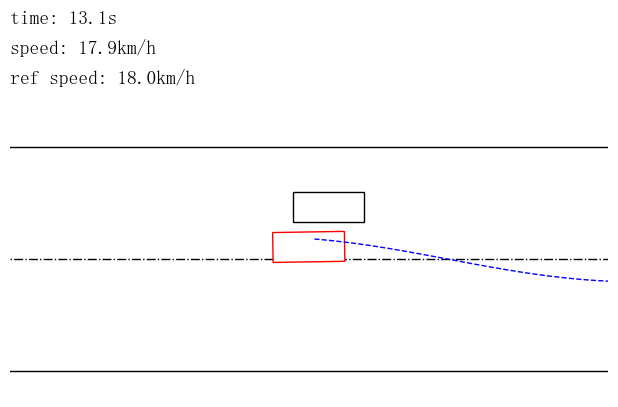

0.032366812


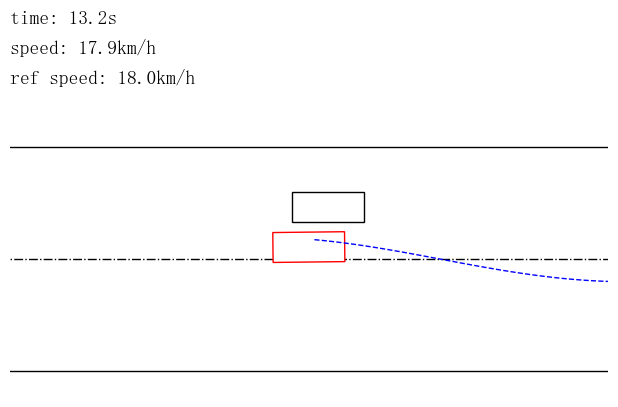

0.04737377


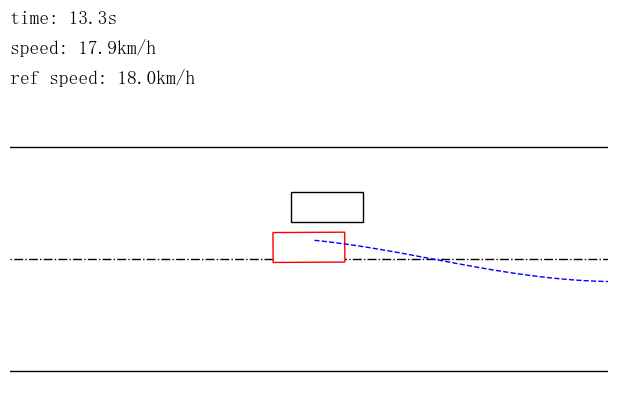

0.032389164


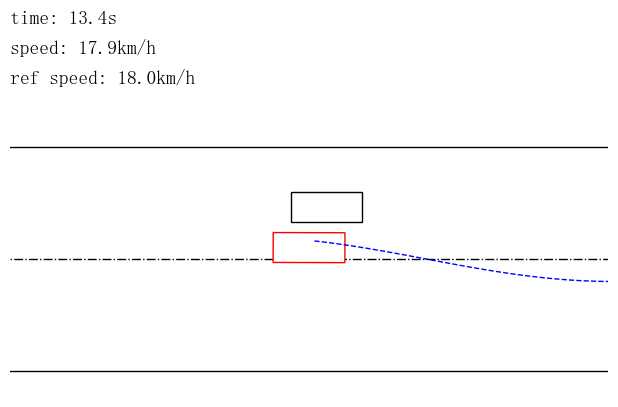

0.017257035


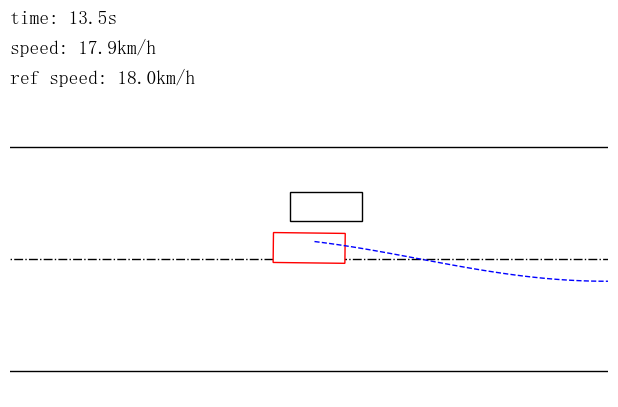

0.009934604


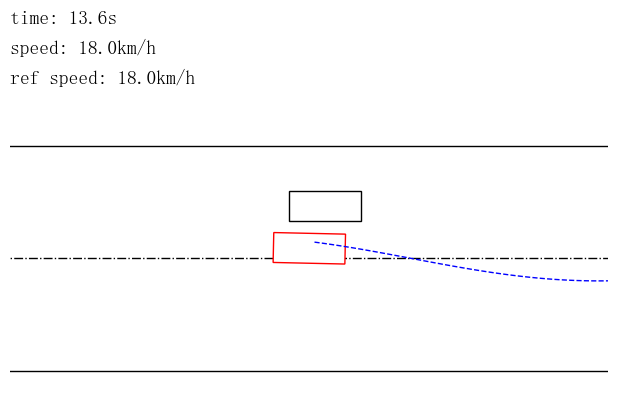

0.004900992


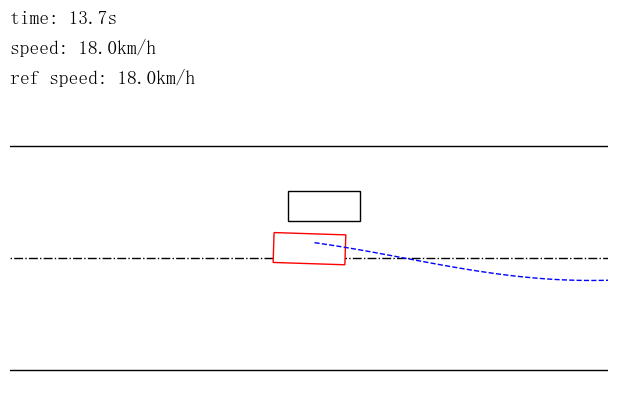

0.0027060509


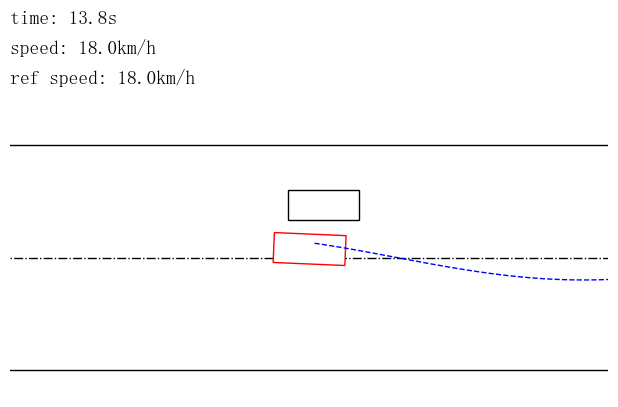

0.001873076


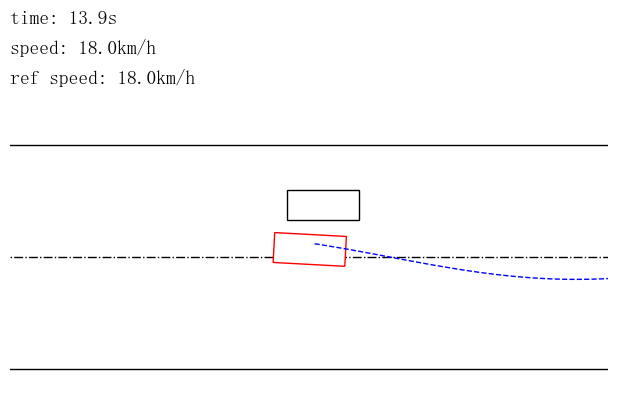

0.0013694167


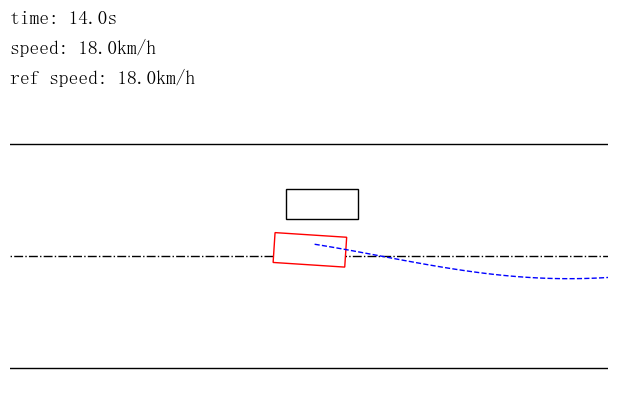

0.0011026859


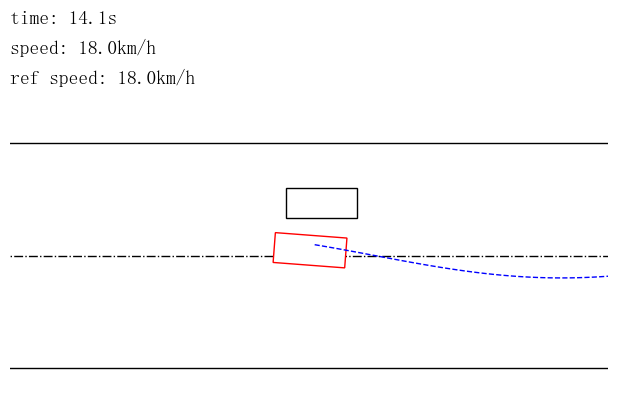

0.0009328127


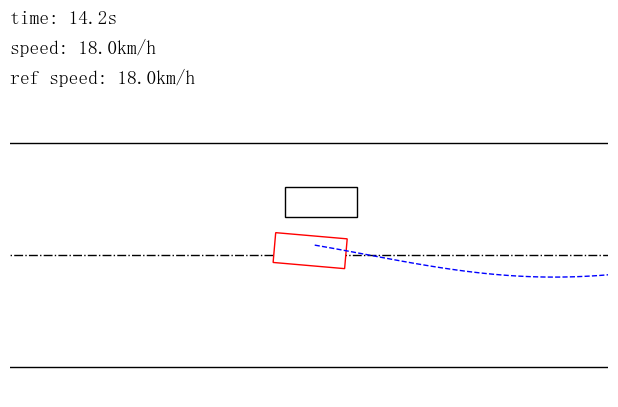

0.0008478761


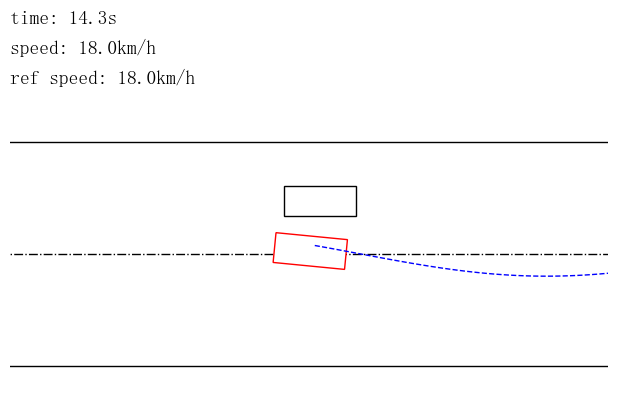

0.00079870224


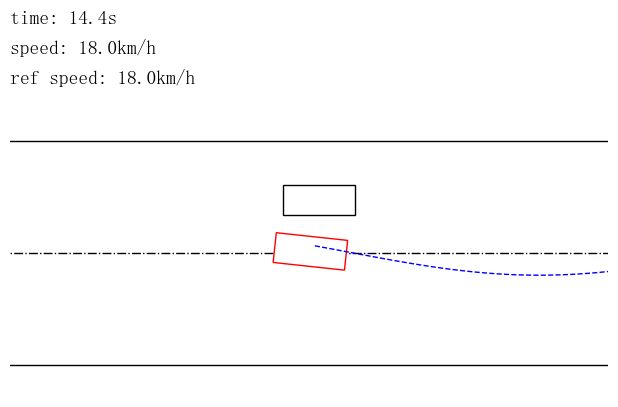

0.0007674098


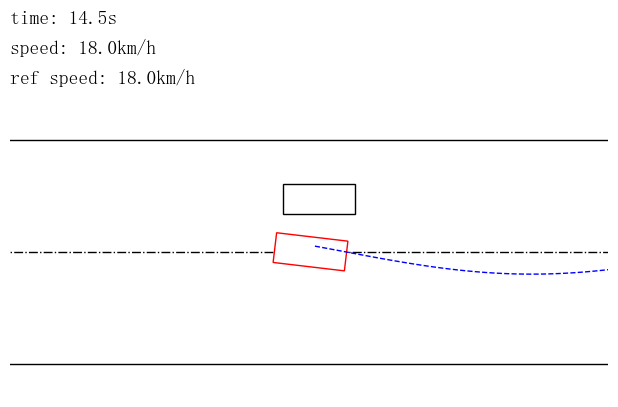

0.00074505806


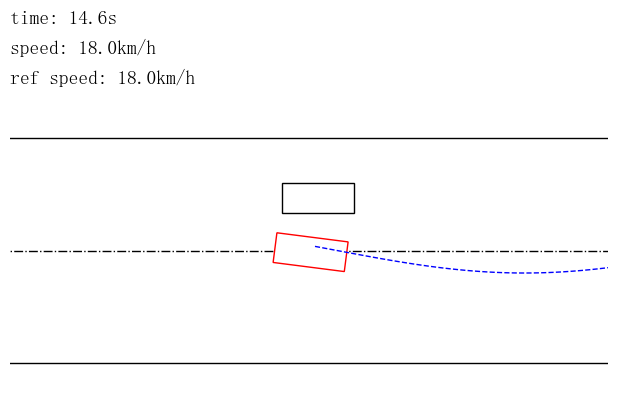

0.0007286668


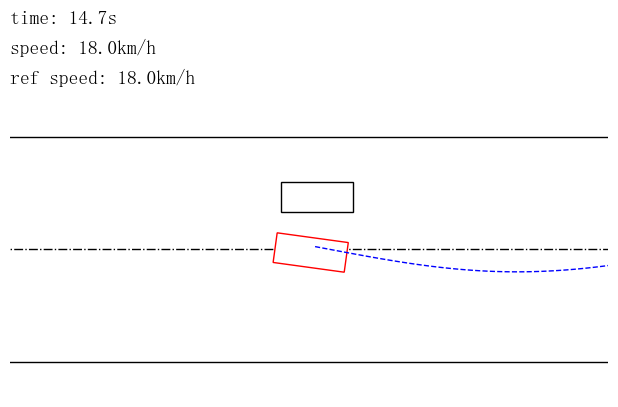

0.00071674585


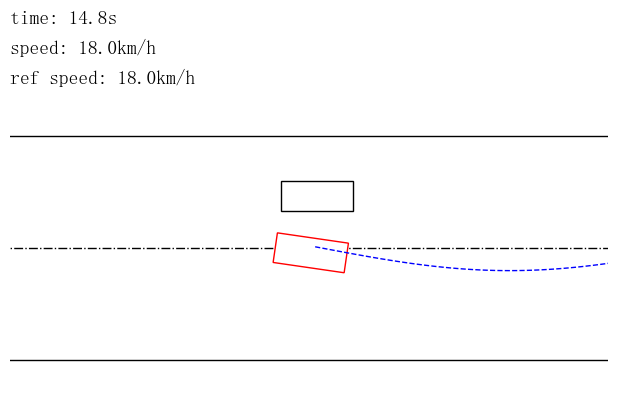

0.0007048249


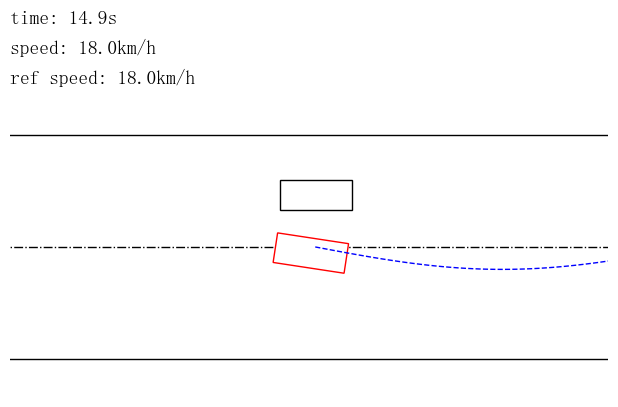

0.0006943941


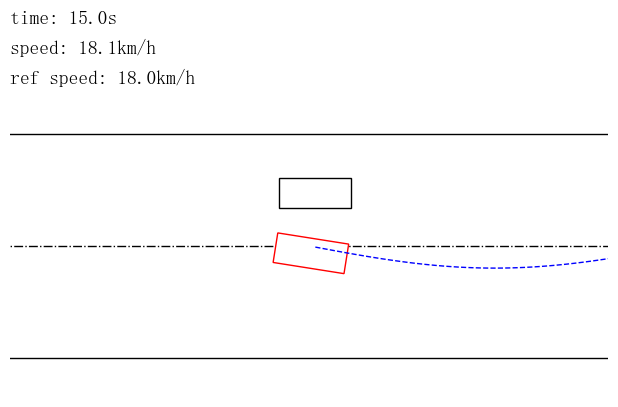

0.0006854534


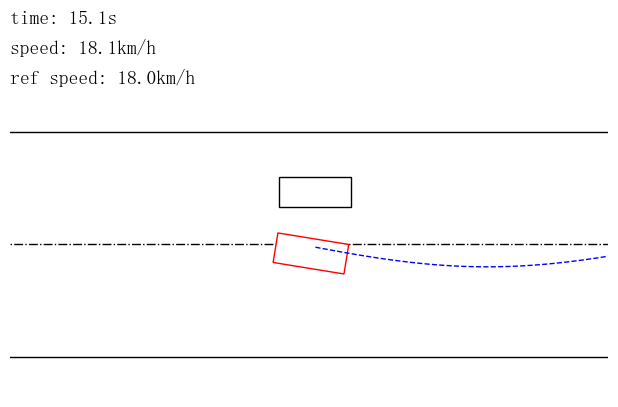

0.00067800283


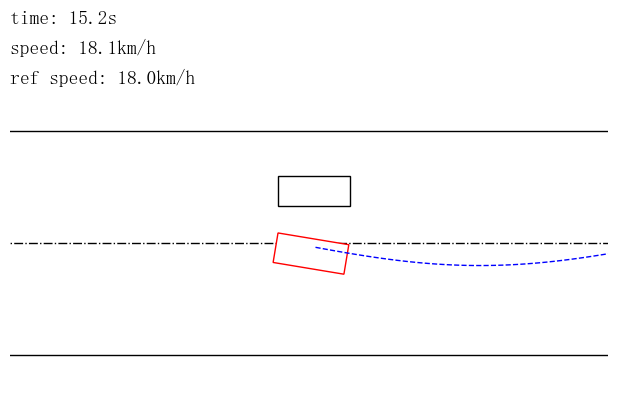

0.00066906214


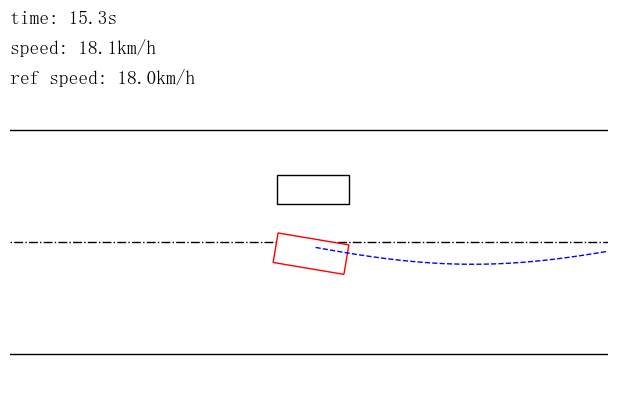

0.00066012144


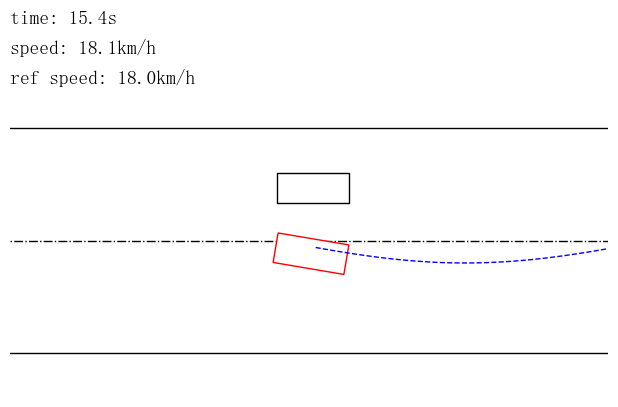

0.0006467104


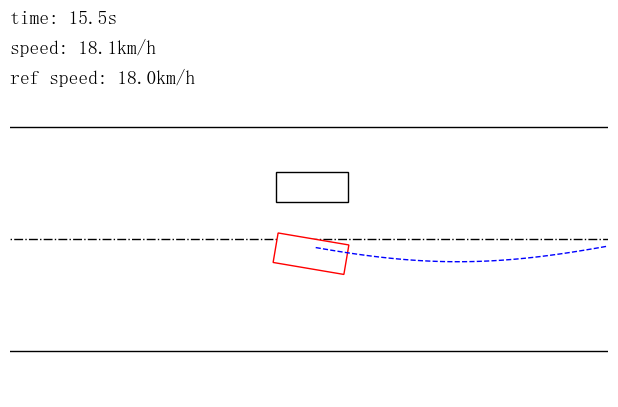

0.00062584877


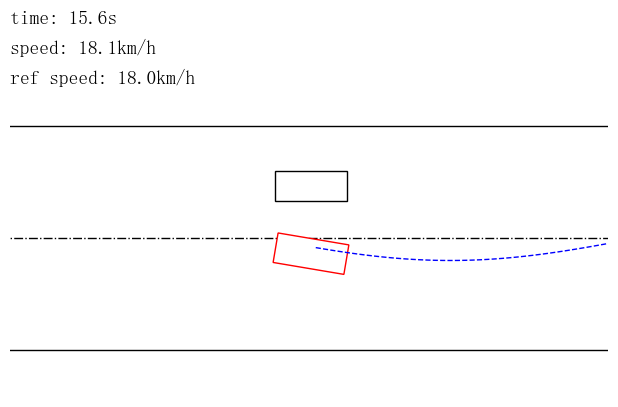

0.00059455633


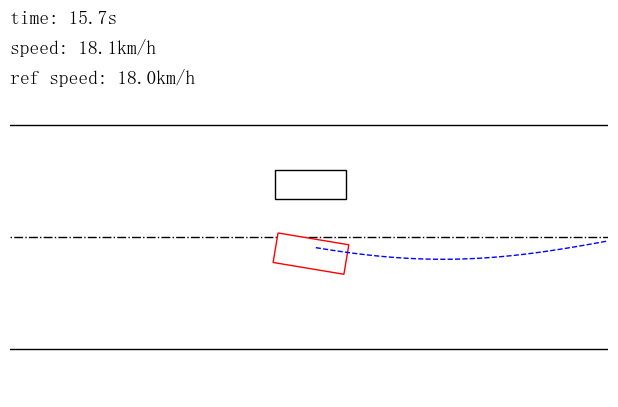

0.0005468726


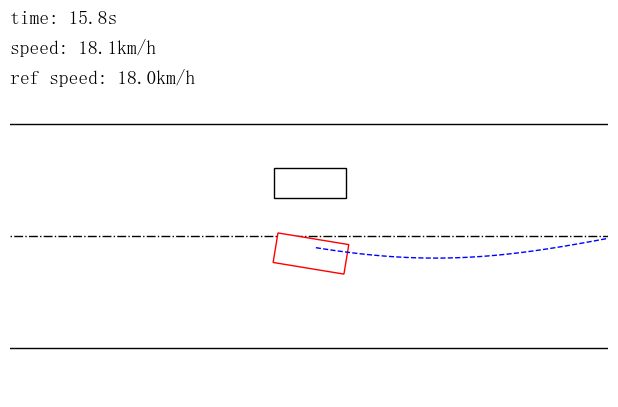

0.00048726797


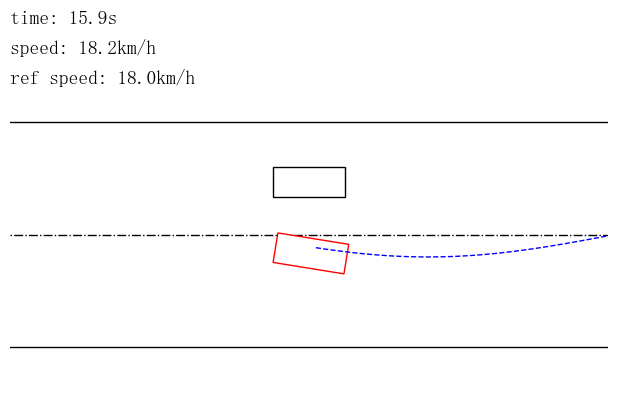

0.00042319298


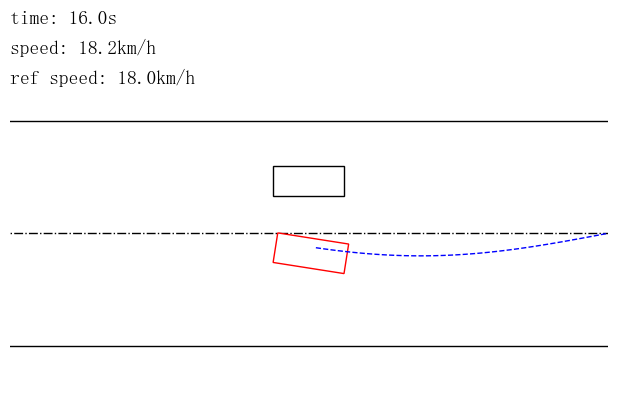

0.0003695488


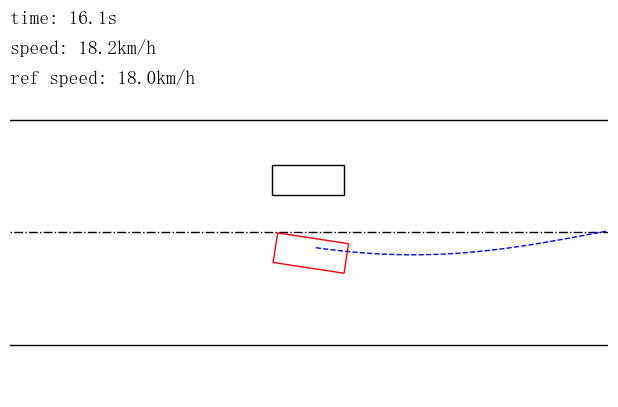

0.00032782555


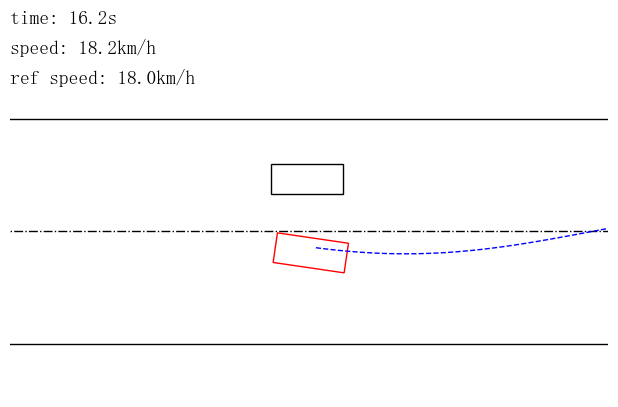

0.00029951334


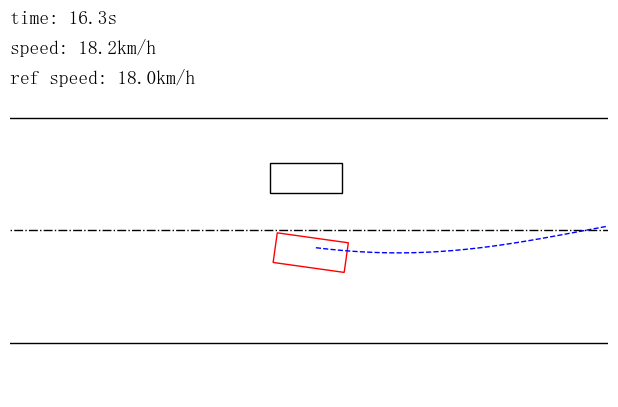

0.0002786517


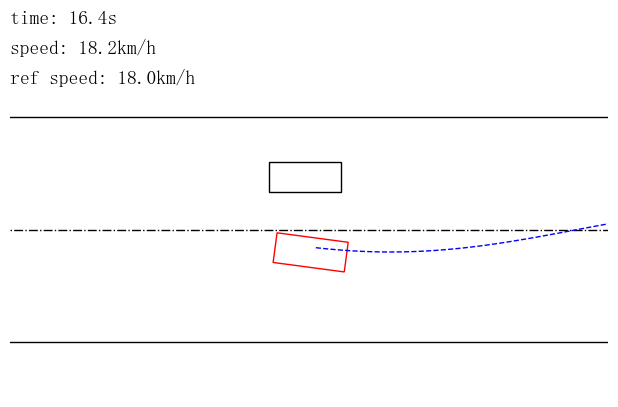

0.00026524067


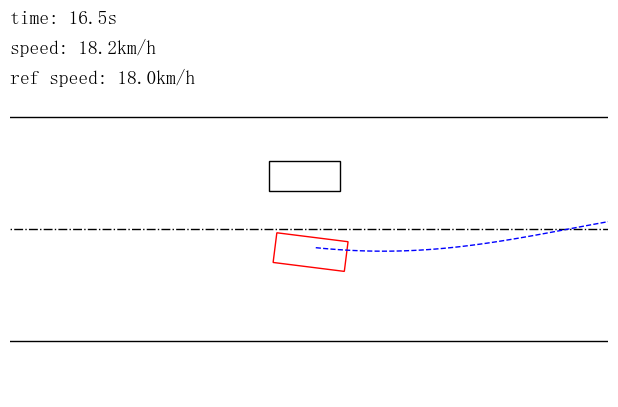

0.00025629997


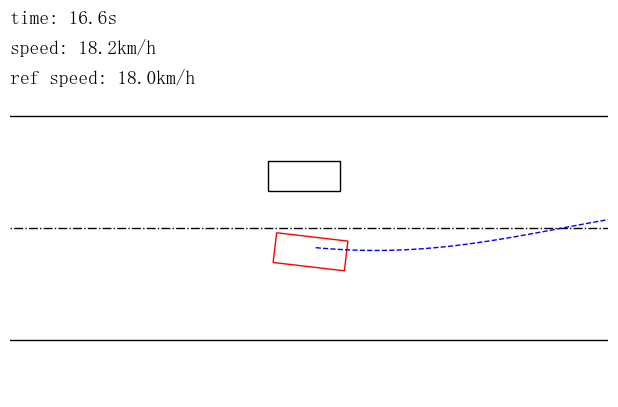

0.0002503395


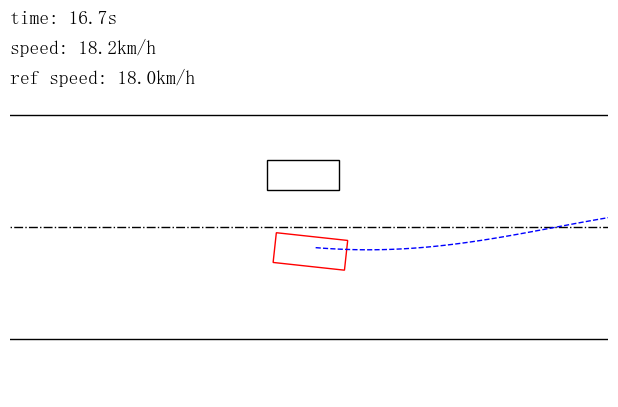

0.00024437904


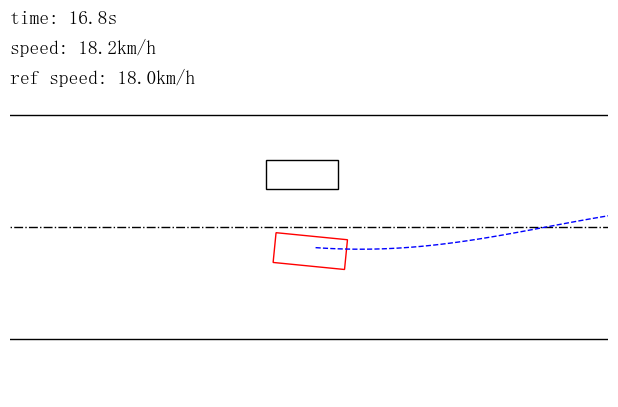

0.00024139881


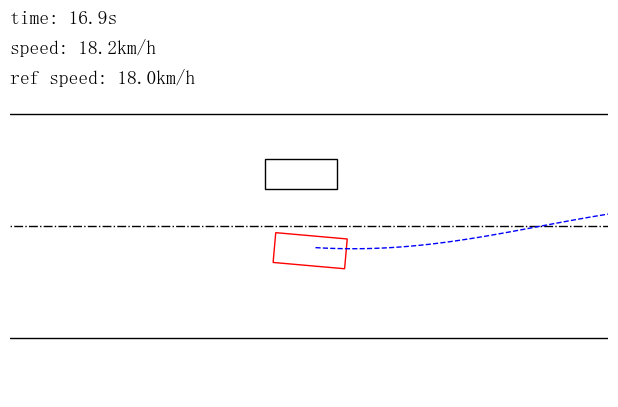

0.00023841858


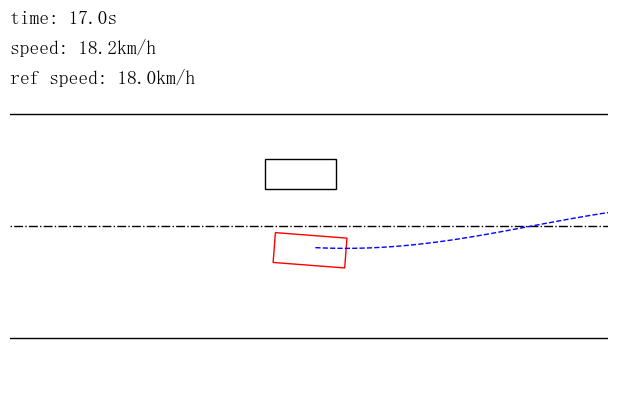

0.00023692846


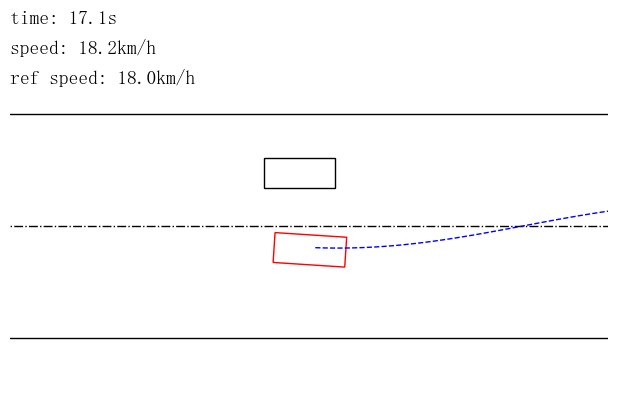

0.00023394823


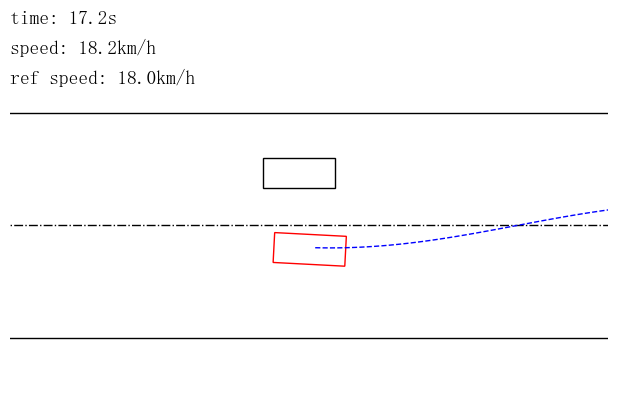

0.00023394823


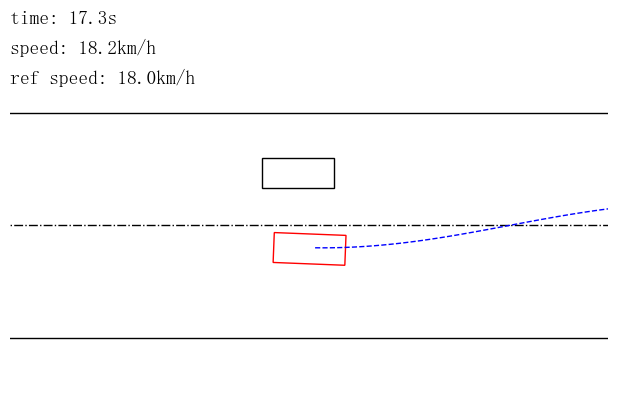

0.00023245811


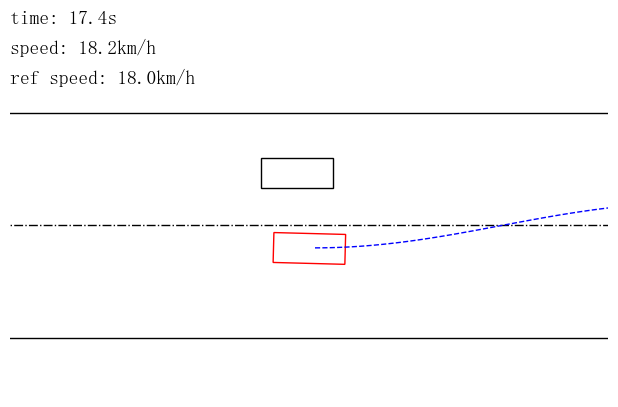

0.00023245811


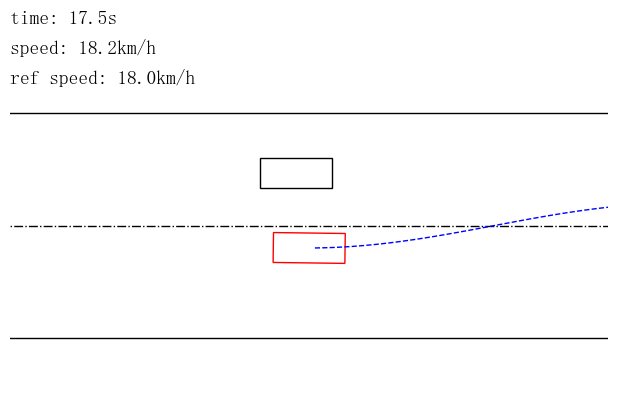

0.00023245811


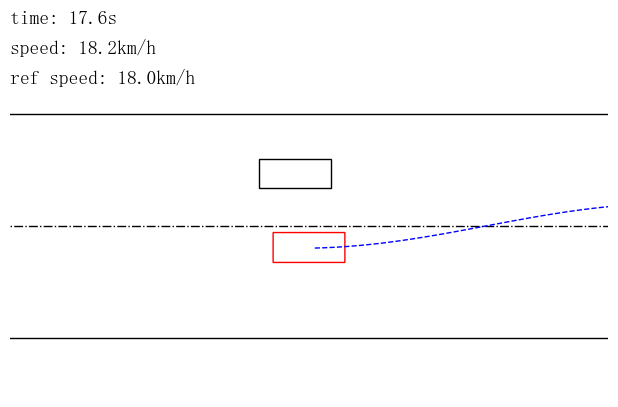

0.00023245811


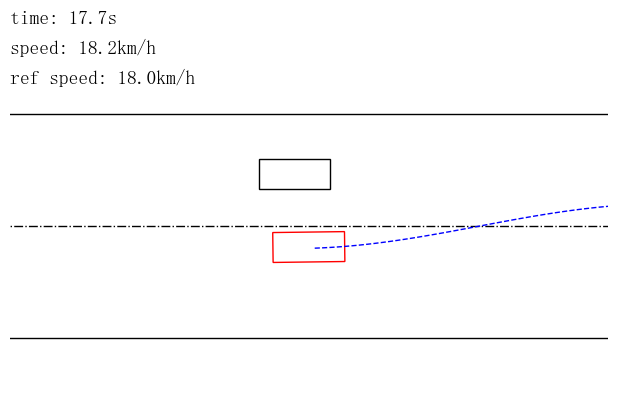

0.00023394823


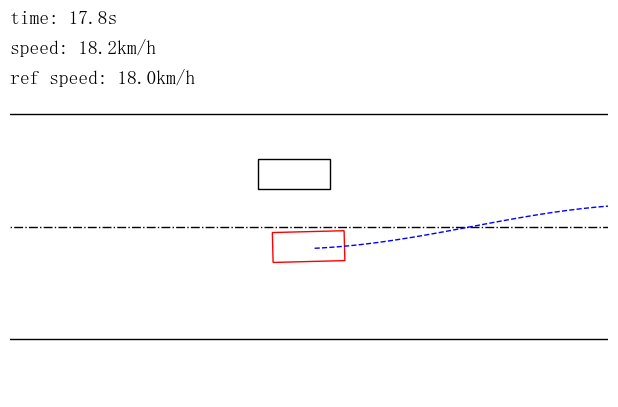

0.00023543835


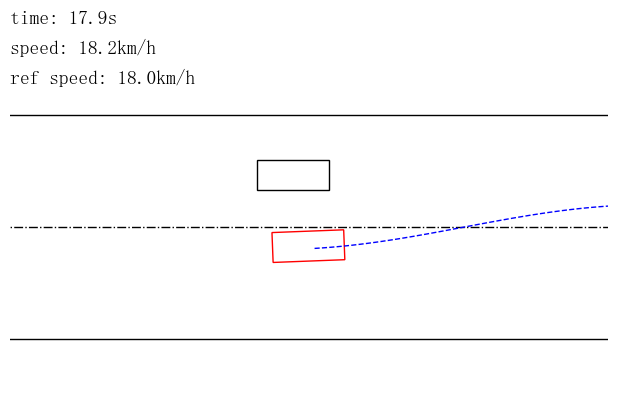

0.00023692846


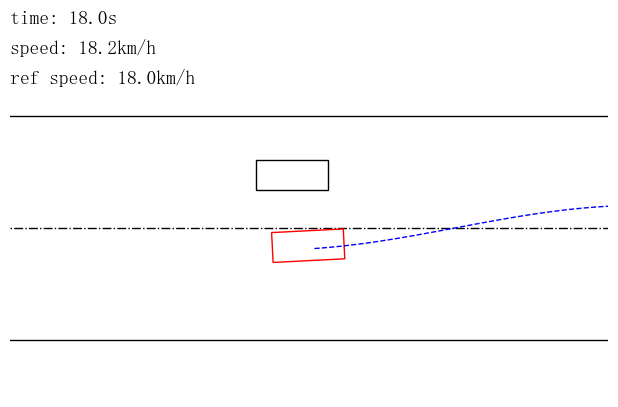

0.00023841858


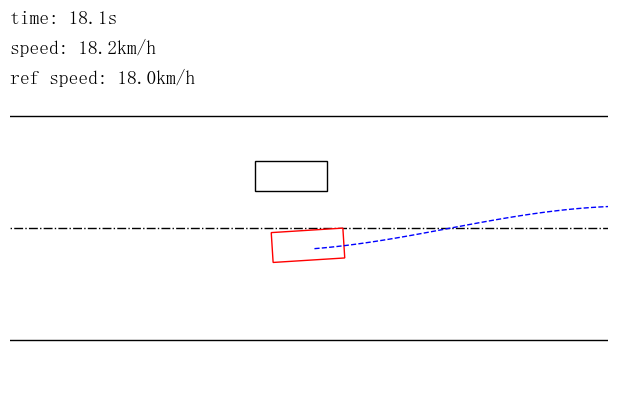

0.00024139881


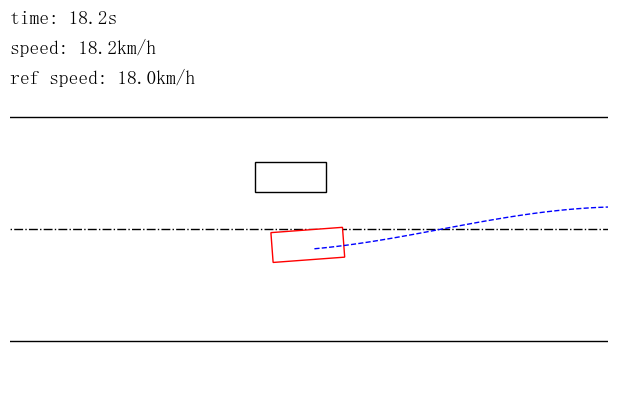

0.00024586916


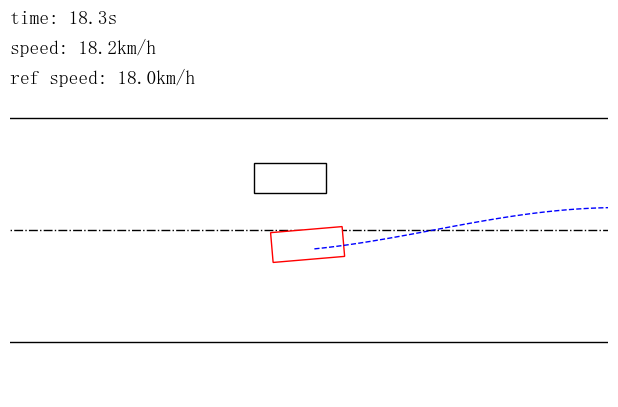

0.0002503395


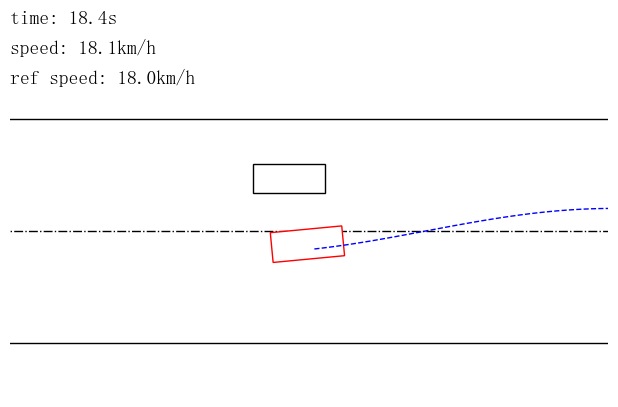

0.00025629997


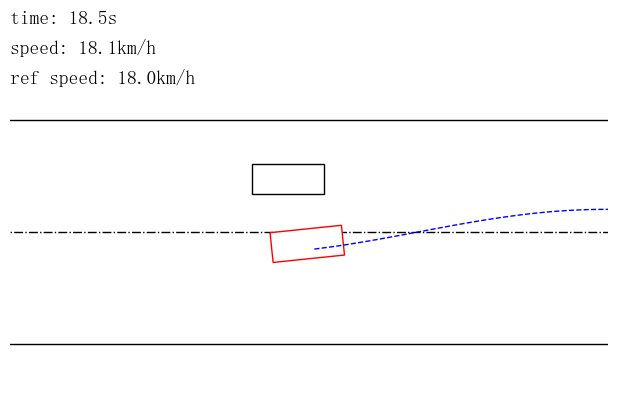

0.00026524067


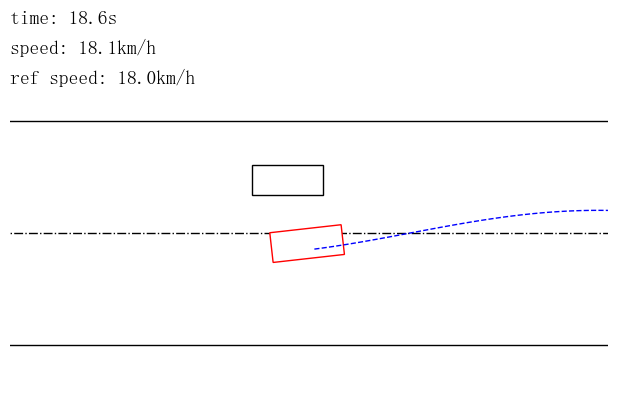

0.0002771616


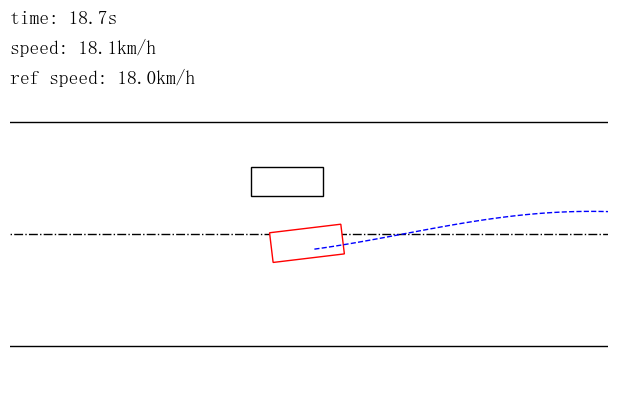

0.00029802322


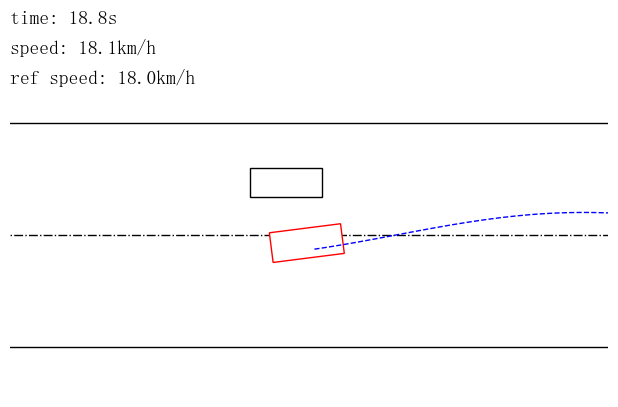

0.0003248453


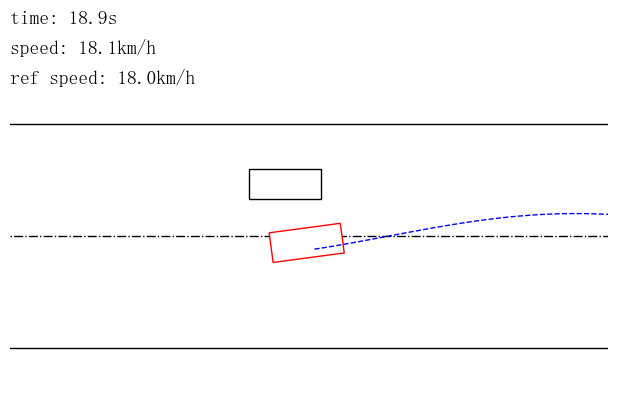

0.00036507845


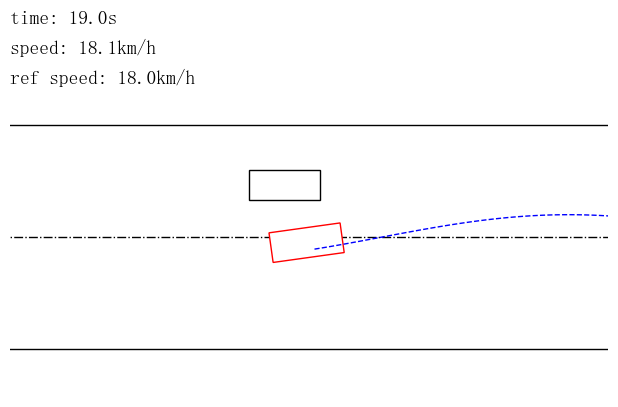

0.0004172325


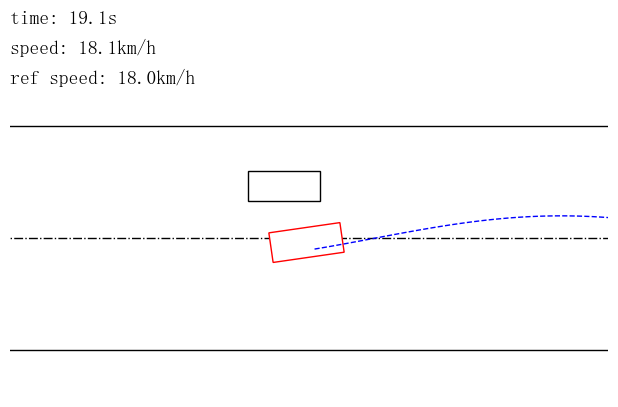

0.0004813075


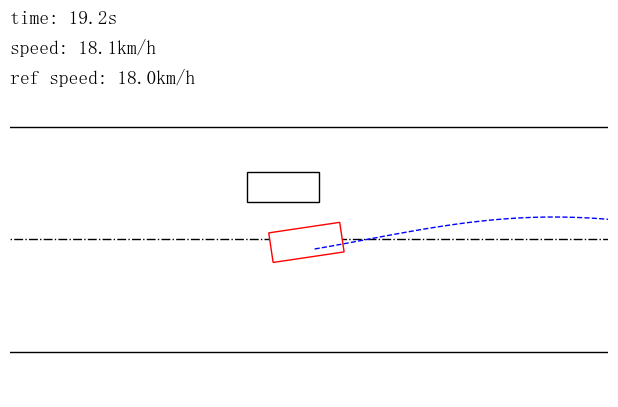

0.0005453825


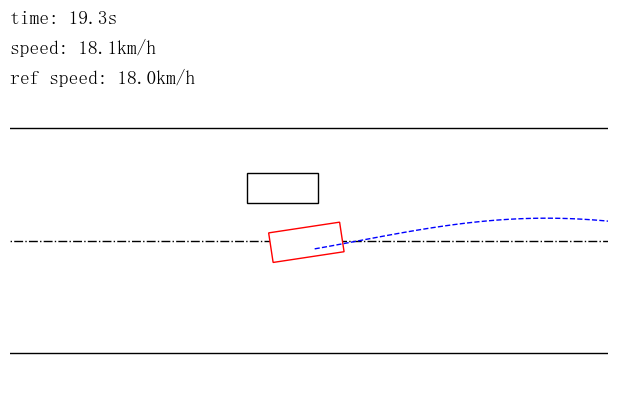

0.0005930662


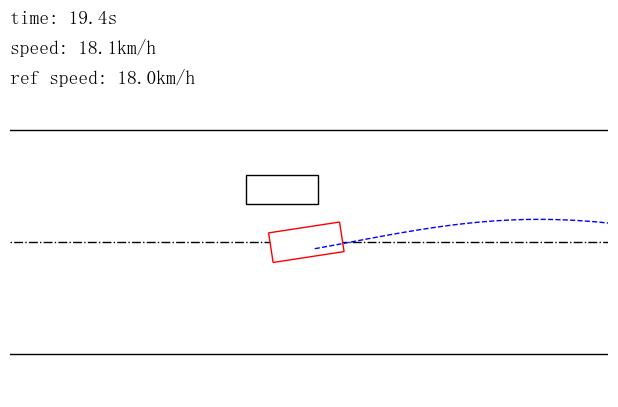

0.00062584877


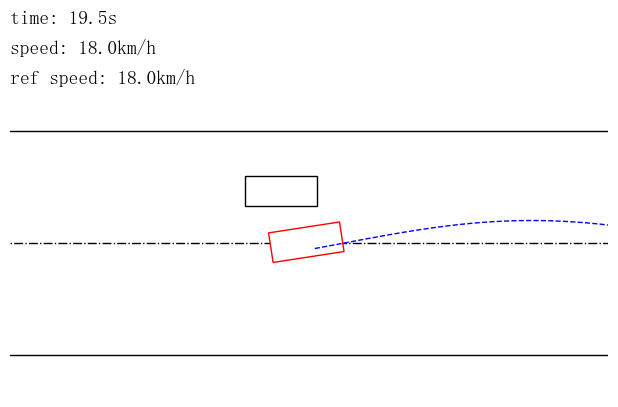

0.0006467104


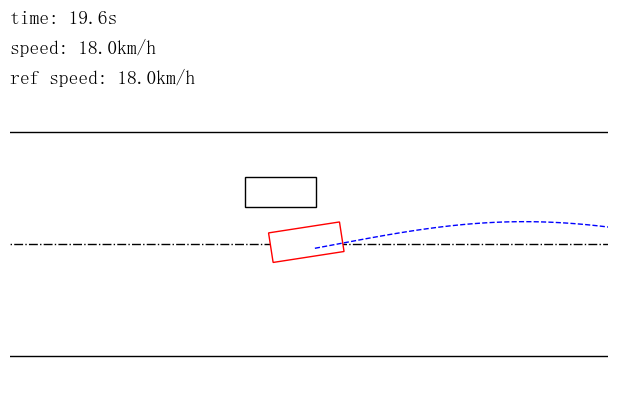

0.00066012144


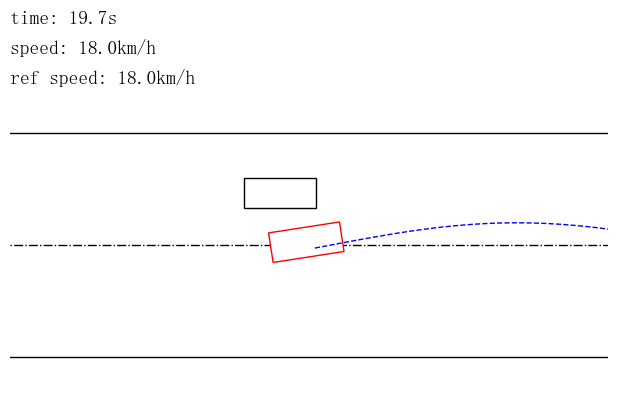

0.00067055225


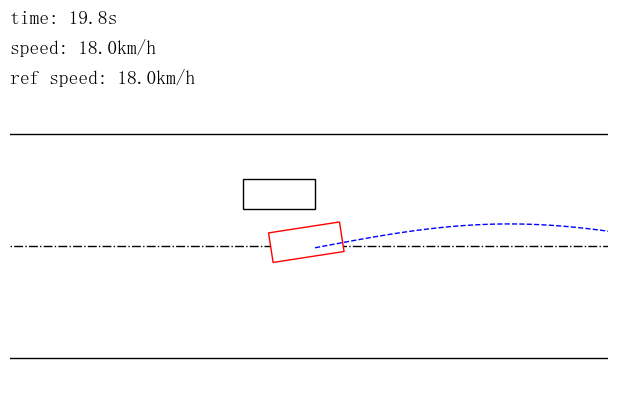

0.00067800283


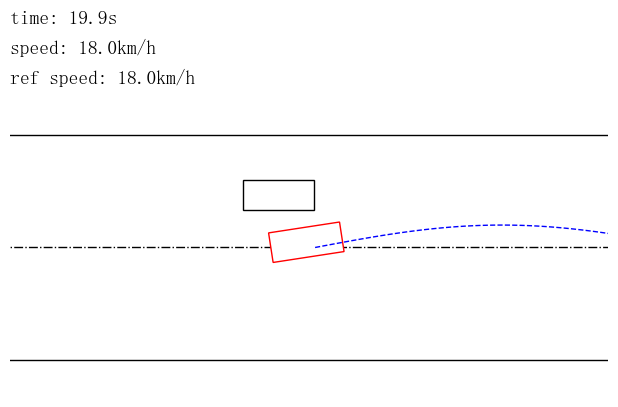

0.00068694353


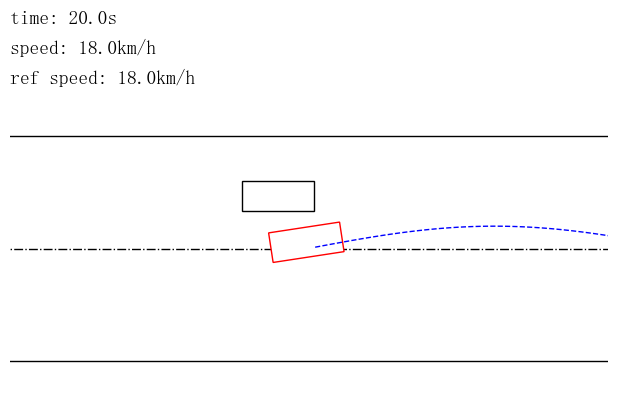

[10:28:16] test length mean: 200.0
[10:28:16] test return mean: -2.356297731399536


In [3]:
env_name = "tracking"
log_dir = "02-25-23_15.27.08_DRPO_22" # fill in this
epoch = 314 # fill in this

# load cfg from the trained model
cfg = Config()

assert env_name == "tracking", 'This file is only for tracking env'
assert log_dir is not None, 'Must specify --run-dir'
run_dir = LOGS_DIR / log_dir
assert run_dir.is_dir(), f'Run directory does not exist: {run_dir}'

with (run_dir / 'config.json').open('r') as f:
    saved_cfg = json.load(f)
    assert env_name == saved_cfg["env_name"]
    cfg.update(saved_cfg)

cfg.alg_cfg.update(dict(mode='test'))
cfg.env_cfg.update(dict(render=True))

# Ensure all required arguments have been set
cfg.verify()
for attr in ('env_name', 'seed'):
    assert hasattr(cfg, attr), f'Config must specify {attr}'

# load model and set env
time_now = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M-%S")
test_log_dir = run_dir / 'test-{}'.format(time_now)
test_log_dir.mkdir(exist_ok=True, parents=True)

print(f'Test log directory: {test_log_dir}')

# initialize tester and run evaluation
tester = Tester(cfg, test_log_dir, epoch)
test_traj, info_traj = tester.run_evaluation(print_lam=True)

In [17]:
# get necessary data trajectories
traj_len = len(test_traj[0].get("actions"))
time_steps = np.arange(traj_len) * 0.1

surrs_states = np.array(info_traj[0]["surr_state"], dtype=np.float32)
states = np.array(info_traj[0]["state"], dtype=np.float32)
actions = np.array(test_traj[0].get("actions").cpu().numpy(), dtype=np.float32)
constraints = np.array(info_traj[0]["constraint_value"], dtype=np.float32)
video = np.array(info_traj[0]["img"], dtype=np.float32) / 255.0

ego_pos = states[:, :2]
ref_pos = np.array(info_traj[0]["ref_points"], dtype=np.float32)[:, 0, :2]
surrs_poses = surrs_states[:, :, :2]

# scale actions with pi/6 and 3
actions[:, 0] *= np.pi / 6
actions[:, 1] *= 3

smoothed_steer = smooth(actions[:, 0], sm=15)
smoothed_throttle = smooth(actions[:, 1], sm=3)

/home/yudongjie/anaconda3/envs/smbrl/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/yudongjie/anaconda3/envs/smbrl/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator


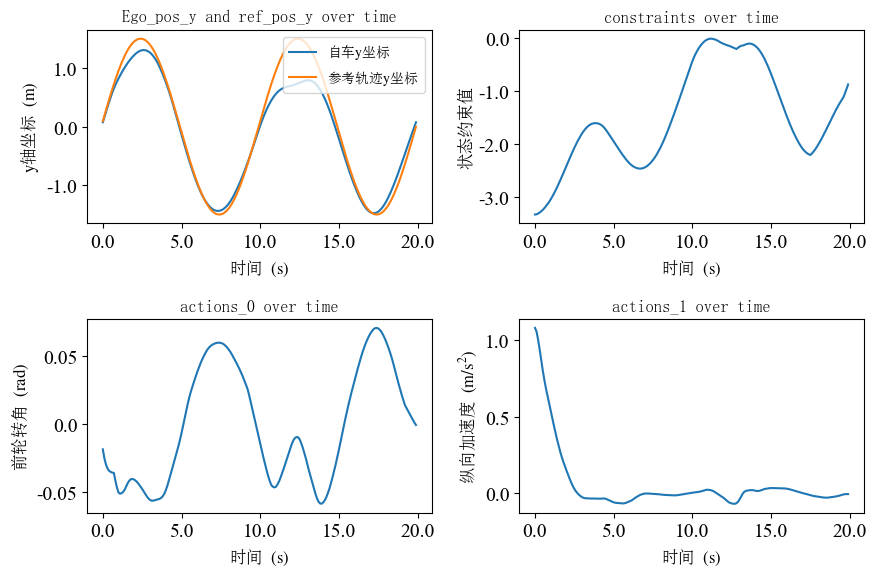

In [37]:
# plot curves
# draw a 2 * 2 figure, where the top left is the ref_pos_1 (red) and ego_pos_1 (blue) evolution
# over time; top right the constraints; bottom left the actions_0; bottom right the actions_1
fig, axs = plt.subplots(2, 2, figsize=(9, 6))
axs[0, 0].plot(time_steps, ego_pos[:, 1], label=r"自车$\mathrm{y}$坐标")
axs[0, 0].plot(time_steps, ref_pos[:, 1], label=r"参考轨迹$\mathrm{y}$坐标")
axs[0, 0].set_title("Ego_pos_y and ref_pos_y over time", fontsize=12)
axs[0, 0].set_xlabel(r"时间 $\mathrm{(s)}$", fontsize=12)
axs[0, 0].set_ylabel(r"$\mathrm{y}$轴坐标 $\mathrm{(m)}$", fontsize=12)
axs[0, 0].legend(fontsize=10, loc="upper right")

axs[0, 1].plot(time_steps, constraints)
axs[0, 1].set_title("constraints over time", fontsize=12)
axs[0, 1].set_xlabel(r"时间 $\mathrm{(s)}$", fontsize=12)
axs[0, 1].set_ylabel(r"状态约束值", fontsize=12)

axs[1, 0].plot(time_steps, smoothed_steer)
axs[1, 0].set_title("actions_0 over time", fontsize=12)
axs[1, 0].set_xlabel(r"时间 $\mathrm{(s)}$", fontsize=12)
axs[1, 0].set_ylabel(r"前轮转角 $\mathrm{(rad)}$", fontsize=12)

axs[1, 1].plot(time_steps, smoothed_throttle)
axs[1, 1].set_title("actions_1 over time", fontsize=12)
axs[1, 1].set_xlabel(r"时间 $\mathrm{(s)}$", fontsize=12)
axs[1, 1].set_ylabel(r"纵向加速度 $\mathrm{(m/s^2)}$", fontsize=12)

for ax in axs.flat:
    xticks = np.around(ax.get_xticks(), 2)
    ax.set_xticklabels(xticks, fontdict=fontdict)
    yticks = np.around(ax.get_yticks(), 2)
    ax.set_yticklabels(yticks, fontdict=fontdict)

fig.tight_layout()


/home/yudongjie/anaconda3/envs/smbrl/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/home/yudongjie/anaconda3/envs/smbrl/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


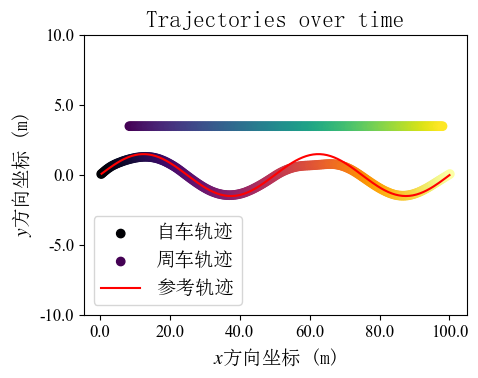

In [66]:
# draw a figure about the ego_pos, surrs_poses, ref_pos evoluation
# x-pos_0, y-pos_1 with scatter
# the color should be darker as time goes by

fig, axs = plt.subplots(1, 1, figsize=(5, 4))
axs.scatter(ego_pos[:, 0], ego_pos[:, 1], c=time_steps, label="自车轨迹", cmap="inferno")
axs.scatter(surrs_poses[:, :, 0], surrs_poses[:, :, 1], c=time_steps, label="周车轨迹", cmap="viridis")
axs.plot(ref_pos[:, 0], ref_pos[:, 1], label="参考轨迹", c="red")
axs.set_title("Trajectories over time")
axs.set_xlabel(r"$x$方向坐标 (m)")
axs.set_ylabel(r"$y$方向坐标 (m)")
axs.set_ylim(-10, 10)
axs.legend()

xticks = np.around(axs.get_xticks(), 2)
axs.set_xticklabels(xticks, fontdict=fontdict)
yticks = np.around(axs.get_yticks(), 2)
axs.set_yticklabels(yticks, fontdict=fontdict)

fig.tight_layout()

plt.savefig(str(test_log_dir) + "/traj.pdf", dpi=300)

In [47]:
# draw animations
fig = plt.figure()
im = plt.imshow(video[0,:,:,:])
plt.axis('off')

plt.close() # this is required to not display the generated image

def init():
    im.set_data(video[0,:,:,:])

def animate(i):
    im.set_data(video[i,:,:,:])
    return im

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=video.shape[0],
                               interval=50)
HTML(anim.to_html5_video())

/home/yudongjie/anaconda3/envs/smbrl/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/yudongjie/anaconda3/envs/smbrl/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator


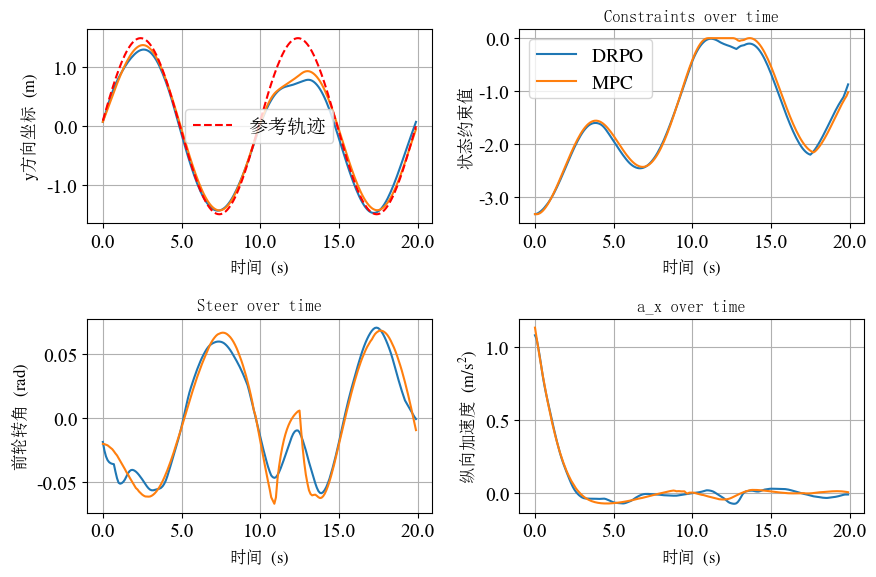

In [65]:
# load MPC data to a dataframe and plot comparison
mpc_data = pd.read_csv(run_dir / "MPC" / 'mpc_data.csv')

fig, axs = plt.subplots(2, 2, figsize=(9, 6))
axs[0, 0].plot(time_steps, ego_pos[:, 1])
axs[0, 0].plot(time_steps, mpc_data["ego_pos_1"])
axs[0, 0].plot(time_steps, ref_pos[:, 1], label="参考轨迹", c="red", linestyle="--")
axs[0, 0].set_ylabel(r"$\mathrm{y}$方向坐标 $\mathrm{(m)}$", fontsize=12)
axs[0, 0].set_xlabel(r"时间 $\mathrm{(s)}$", fontsize=12)
axs[0, 0].legend()

axs[0, 1].plot(time_steps, constraints, label=r"$\rm DRPO$")
axs[0, 1].plot(time_steps, mpc_data["constraints"], label=r"$\rm MPC$")
axs[0, 1].set_title("Constraints over time", fontsize=12)
axs[0, 1].set_xlabel(r"时间 $\mathrm{(s)}$", fontsize=12)
axs[0, 1].set_ylabel("状态约束值", fontsize=12)
axs[0, 1].legend()

axs[1, 0].plot(time_steps, smoothed_steer, label="DRPO")
axs[1, 0].plot(time_steps, mpc_data["actions_0"], label="MPC")
axs[1, 0].set_title("Steer over time", fontsize=12)
axs[1, 0].set_xlabel(r"时间 $\mathrm{(s)}$", fontsize=12)
axs[1, 0].set_ylabel(r"前轮转角 $\mathrm{(rad)}$", fontsize=12)

axs[1, 1].plot(time_steps, smoothed_throttle, label="DRPO")
axs[1, 1].plot(time_steps, mpc_data["actions_1"], label="MPC")
axs[1, 1].set_title("a_x over time", fontsize=12)
axs[1, 1].set_xlabel(r"时间 $\mathrm{(s)}$", fontsize=12)
axs[1, 1].set_ylabel(r"纵向加速度 $\mathrm{(m/s^2)}$", fontsize=12)

for ax in axs.flat:
    ax.grid(True)
    xticks = np.around(ax.get_xticks(), 2)
    ax.set_xticklabels(xticks, fontfamily='times new roman')
    yticks = np.around(ax.get_yticks(), 2)
    ax.set_yticklabels(yticks,  fontfamily='times new roman')

fig.tight_layout()

plt.savefig(str(test_log_dir) + "/MPC_compare.pdf", dpi=300)

In [67]:
# compute the steer and a_x max and mean error and print
steer_error = np.abs(smoothed_steer - mpc_data["actions_0"])
steer_range = np.max(mpc_data["actions_0"]) - np.min(mpc_data["actions_0"])
ax_error = np.abs(smoothed_throttle - mpc_data["actions_1"])
ax_range = np.max(mpc_data["actions_1"]) - np.min(mpc_data["actions_1"])

print(f"steer max error: {np.max(steer_error) / steer_range}, mean error: {np.mean(steer_error) / steer_range}")
print(f"a_x max error: {np.max(ax_error) / ax_range}, mean error: {np.mean(ax_error) / ax_range}")

steer max error: 0.1827546210395738, mean error: 0.054462022237624794
a_x max error: 0.04490115935758193, mean error: 0.01524160451954072


/home/yudongjie/anaconda3/envs/smbrl/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/home/yudongjie/anaconda3/envs/smbrl/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  


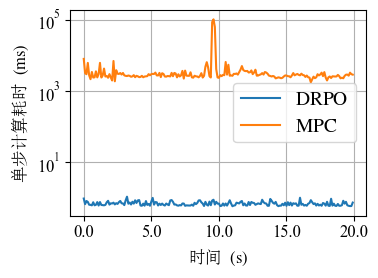

In [64]:
# plot the time consumed by MPC and RL with log-y
fig, axs = plt.subplots(1, 1, figsize=(4, 3))
axs.plot(time_steps, np.array(info_traj[0]["time"]) * 1000, label=r"$\rm DRPO$")
axs.plot(time_steps, mpc_data["time"] * 1000, label=r"$\rm MPC$")
# axs.set_title("Time consumed by MPC and RL", fontsize=12)
axs.set_xlabel(r"时间 $\rm (s)$", fontsize=12)
axs.set_ylabel(r"单步计算耗时 $\rm (ms)$", fontsize=12)

# turn on the grid
axs.grid(True)
axs.legend()

xticks = axs.get_xticks()
axs.set_xticklabels(xticks, fontdict=fontdict)
yticks = axs.get_yticks()
axs.set_yticklabels(yticks, fontdict=fontdict)

axs.set_yscale("log")
fig.tight_layout()

plt.savefig(str(test_log_dir) + "/times_consumption.pdf", dpi=300)